In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("A4.ipynb")

# Assignment 4 (10 Points in total, will be 10% of your grade)

## How to complete assignments

There are both code and math/text components to these assignments.

### Math/text responses

Whenever you see:

```markdown
_Type your answer here, replacing this text._ 
```

You should editing this Markdown cell and insert your answers. 

If the question is asking for math use LaTeX. We understand not everyone is fluent in LaTeX but we think this is a good skill to learn. [Here is a fantastic tutorial from CalTech about using $\LaTeX$ in Jupyter Notebook.](http://chebe163.caltech.edu/2018w/handouts/intro_to_latex.html). You could also find various $\LaTeX$ tutorials and cheat sheets online. 

Some things to keep in mind:  Jupyter's Markdown-LaTeX will display things that don't work when you turn in the assignment. Here are some generic ideas that we find prevent trouble down the road. 
1. Test your output to see if it works well when you submit.  So execute the otter grader export and check the PDF to make sure it looks right!!! 
1. Avoid ```$x=1$ ``` use ```$$x=1$$``` instead
1.  No trailing space after the first dollar sign and before the second dollar sign. i.e. don't do `$ $ x = 5 $ $` use `$$x=5$$` instead
1. Markdown lists in the same cell after a math environment don't seem to work, and we don't know why
1. Avoid ```\align``` use ```\aligned``` instead

An example:


#### Question: Given a triangle with sides $x,y,z$ where $x=3$, $y=4$ calculate $z$

Your answer in the markdown should be

```
$$z = \sqrt{x^2 + y^2} = \sqrt{3^2+4^2} = \sqrt{25} = 5$$
```
which will render as 

$$z = \sqrt{x^2 + y^2} = \sqrt{3^2+4^2} = \sqrt{25} = 5$$


These responses will mostly be manually graded. There is leeway for individual style in notation, so don't worry too much as long as you don't write anything that is false. 

### Code responses

Whenever you see:

```python
answers = ...
```

You need to replace this section with some code that answers the questions and meets the specified criteria. Make sure you remove the 'raise' line when you do this (or your notebook will raise an error, regardless of any other code, and thus fail the grading tests).

You should write the answer to the questions in those cells (the ones with `...`), but you can also add extra cells to explore / investigate things if you need / want to. 

Any cell with `grader.check("Question_id")` statements in it is a test cell. You should not try to change or delete these cells. Note that there might be more than one assert that tests a particular question. Once you run the cell, you will see the public tests we provided for you.

If a test does fail, reading the error that is printed out should let you know which test failed, which may be useful for fixing it.

Note that some cells, including the test cells, may be read only, which means they won't let you edit them. If you cannot edit a cell - that is normal, and you shouldn't need to edit that cell.

## Question 1: Multiple Choice (1 Points)

For each questions, assign your answer to the list with the correct choices.

**Question 1.1:** Which of the following is a true property of the Kullback-Leibler divergence?

A): KL divergence is always negative.

B): KL divergence can be used to measure the distance between two distributions in both directions interchangeably, i.e. $KL(P||Q) = KL (Q||P)$ is true for every distribution $Q$ and $P$

C): KL divergence is zero if and only if the two distributions being compared are identical.

D): KL divergence satisfies the triangle inequality.

**Question 1.2:** When using the KL divergence to compare two probability distributions $P$ and $Q$, a small KL divergence value indicates that:

A): The distributions $P$ and $Q$ are very similar.

B): The distribution $Q$ is a good approximation of distribution $P$.

C): We would not be very surprised when observing data generated by distribution 
$P$ when our model of the data was $Q$.

D): All of the above

**Question 1.3:** The perplexity parameter in t-SNE:

A): Is independent of the dataset size and only affects the computational complexity of the algorithm.

B): Directly controls the learning rate of the gradient descent optimization in t-SNE.

C): Can be thought of as a measure of the effective number of neighbors for each point and influences the balance between local and global aspects of the data.

D): Sets the number of dimensions to which the data will be reduced.

**Question 1.4:** Which of the following best describes the principle of operation for both t-SNE and UMAP?

A): They both linearly project data into lower-dimensional spaces while preserving global data structure.

B): They both aim to preserve the local neighborhood structure of the data in a lower-dimensional space.

C): They both primarily focus on preserving the pairwise distances between all points in the dataset.

D): They both use a global optimization technique to ensure that similar data points in the high-dimensional space are mapped far apart in the lower-dimensional representation.

**Question 1.5:** The absolute positions of clusters within the embedding space have a direct and interpretable meaning.

A): True

B): False

**Question 1.6** Compared to t-SNE, UMAP:

A) Is generally faster and more scalable, particularly on larger datasets.

B) Can only visualize datasets in two or three dimensions, while t-SNE can project data into any number of dimensions.

C) Lacks the ability to preserve local neighborhood structures of the data.

D) Requires more hyperparameters to be tuned for optimal performance.

_Points:_ 1

In [2]:
multiple_choices = ['C', 'D', 'C', 'B', 'B', 'A']

In [3]:
grader.check("11_multiple_choice")

11_multiple_choice results: All test cases passed!

## Question 2: KL-Divergence (2 Points)

The KL-Divergence is a measure of how one probability distribution $p(x)$ is different from another distribution $q(x)$.

$$\begin{aligned}
D_{KL}(p(x)||q(x)) &= \mathbb{E}_p(x)\left[\log\frac{p(x)}{q(x)}\right] \\
&= \int_{-\infty}^{\infty} p(x)\log \frac{p(x)}{q(x)} dx & \text{for continuous distribution $p$ and $q$} \\
&= \sum p(x)\log \frac{p(x)}{q(x)} & \text{for discrete distribution $p$ and $q$} \\
\end{aligned}$$

<!-- BEGIN QUESTION -->

### Question 2.1: Prove that KL Divergence is Non-negative

Prove that 
$$D_{KL}(p(x)||q(x))\geq 0$$

Hint:
- Apply Jensen's inequality, which says that $\mathbb{E}[f(z)]\geq f(\mathbb{E}[z])$ for any convex function $f:\mathbb{R}\to\mathbb{R}$ and for any random variable $z$.
- In this case, you should use $f(z) = -\log(z)$
- Note that $\log\frac{a}{b} = \log(a)-\log(b) = -(\log(b)-\log(a)) = -\log\frac{b}{a}$
- Think about the case where the divergence would be lowest... when the two distributions are the same!

_Points:_ 2

$$
\begin{aligned}
D_{KL}(p(x) || q(x)) &= \mathbb{E}_p(x)\left[\log\frac{p(x)}{q(x)}\right] \\\\
\text{Apply Jensen's inequality: } \mathbb{E}[f(z)] &\geq f(\mathbb{E}[z]) \\\\
\mathbb{E}_p(x)\left[-\log\frac{q(x)}{p(x)}\right] &\geq -\log\left(\mathbb{E}_p(x)\left[\frac{q(x)}{p(x)}\right]\right) \\\\
\mathbb{E}_p(x)\left[\log\frac{p(x)}{q(x)}\right] &\geq -\log\left(\mathbb{E}_p(x)\left[\frac{q(x)}{p(x)}\right]\right) \\\\
\text{If } p(x) = q(x) \text{: } &\mathbb{E}_p\left[\log\frac{p(x)}{q(x)}\right] = -\log(\mathbb{E}_p[1]) = 0\\\\
\text{Hence, } D_{KL}(p(x) || q(x)) &\geq 0 
\end{aligned}
$$

<!-- END QUESTION -->

## Question 3: Explore PCA v.s. TSNE v.s. UMAP (4 Points)

Let's have you use some interesting data to explore the differences and similarities between dimensionality reduction techniques.

First off we will get UMAP installed for you. 

Then we will download some data with stock prices for 56 large global companies between 2003 and 2007 (a time when the market overall was growing rapidly and before the 2008 crash). These companies come from several different kinds of industries... tech, finance, manufacturing, pharmaceutical, etc.  If you aren't already familiar with these companies and their industries, you really should investigate a little or you won't be able to talk about the results of your analysis properly.  

Lastly we will transform the data in ways that make it easier to find patterns... please make sure you understand how and why these transformations are helpful!

In [4]:
# first off we will need umap
# this is maybe not necessary if you have the newest sklearn
# but assuming you have our environment for this class it is needed
%pip install umap-learn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import sys

import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='white', context='notebook', rc={'figure.figsize':(12,8)})

# plotting helper function
def plot_components(components,x='pc1',y='pc2'):
    '''
    2d scatter plot of dimensionality reductions with labelling

    inputs:
        components (pd.DataFrame) shape is (samples x components), index is sample names
        x (str) name of column in components to plot as x axis
        y (str) name of column in components to plot as y axis

    typically you might generate components like this
        pcs = PCA(n_components=2).fit_transform(daily_change)
        components = pd.DataFrame(pcs,columns=['pc1','pc2'])
        components.index = daily_change.index
    '''
    sns.scatterplot(data=components, x=x, y=y)
    sns.despine()
    ax = plt.gca()
    for company in components.index:
        ax.annotate(company,xy=components.loc[company])

symbol_dict = {
    "TOT": "Total",
    "XOM": "Exxon",
    "CVX": "Chevron",
    "COP": "ConocoPhillips",
    "VLO": "Valero Energy",
    "MSFT": "Microsoft",
    "IBM": "IBM",
    "TWX": "Time Warner",
    "CMCSA": "Comcast",
    "CVC": "Cablevision",
    "YHOO": "Yahoo",
    "DELL": "Dell",
    "HPQ": "HP",
    "AMZN": "Amazon",
    "TM": "Toyota",
    "CAJ": "Canon",
    "SNE": "Sony",
    "F": "Ford",
    "HMC": "Honda",
    "NAV": "Navistar",
    "NOC": "Northrop Grumman",
    "BA": "Boeing",
    "KO": "Coca-Cola",
    "MMM": "3M",
    "MCD": "McDonald's",
    "PEP": "Pepsi",
    "K": "Kellogg",
    "UN": "Unilever",
    "MAR": "Marriott",
    "PG": "Procter Gamble",
    "CL": "Colgate-Palmolive",
    "GE": "General Electric",
    "WFC": "Wells Fargo",
    "JPM": "JPMorgan Chase",
    "AIG": "AIG",
    "AXP": "American Express",
    "BAC": "Bank of America",
    "GS": "Goldman Sachs",
    "AAPL": "Apple",
    "SAP": "SAP",
    "CSCO": "Cisco",
    "TXN": "Texas Instruments",
    "XRX": "Xerox",
    "WMT": "Wal-Mart",
    "HD": "Home Depot",
    "GSK": "GlaxoSmithKline",
    "PFE": "Pfizer",
    "SNY": "Sanofi-Aventis",
    "NVS": "Novartis",
    "KMB": "Kimberly-Clark",
    "R": "Ryder",
    "GD": "General Dynamics",
    "RTN": "Raytheon",
    "CVS": "CVS",
    "CAT": "Caterpillar",
    "DD": "DuPont",
}


symbols, names = np.array(sorted(symbol_dict.items())).T

# # Stock prices are non-stationary time series data... 
# # if you don't know what that means read this https://otexts.com/fpp2/stationarity.html
# # taking the daily difference in stock price helps with non-stationarity by removing big trends
# # looking at that daily difference as a ratio of change
# # normalizes somewhat across stocks with very different prices
# # and may help us discover groups of stocks that 
# # move up and down in lock step but at different raw prices
daily_change = pd.read_csv("data/Q3.csv", index_col=0)

### Question 3.1: PCA plot

Load the necessary things from scikit-learn, do the data transform, use the helper function to plot the results

_Points:_ 0.25

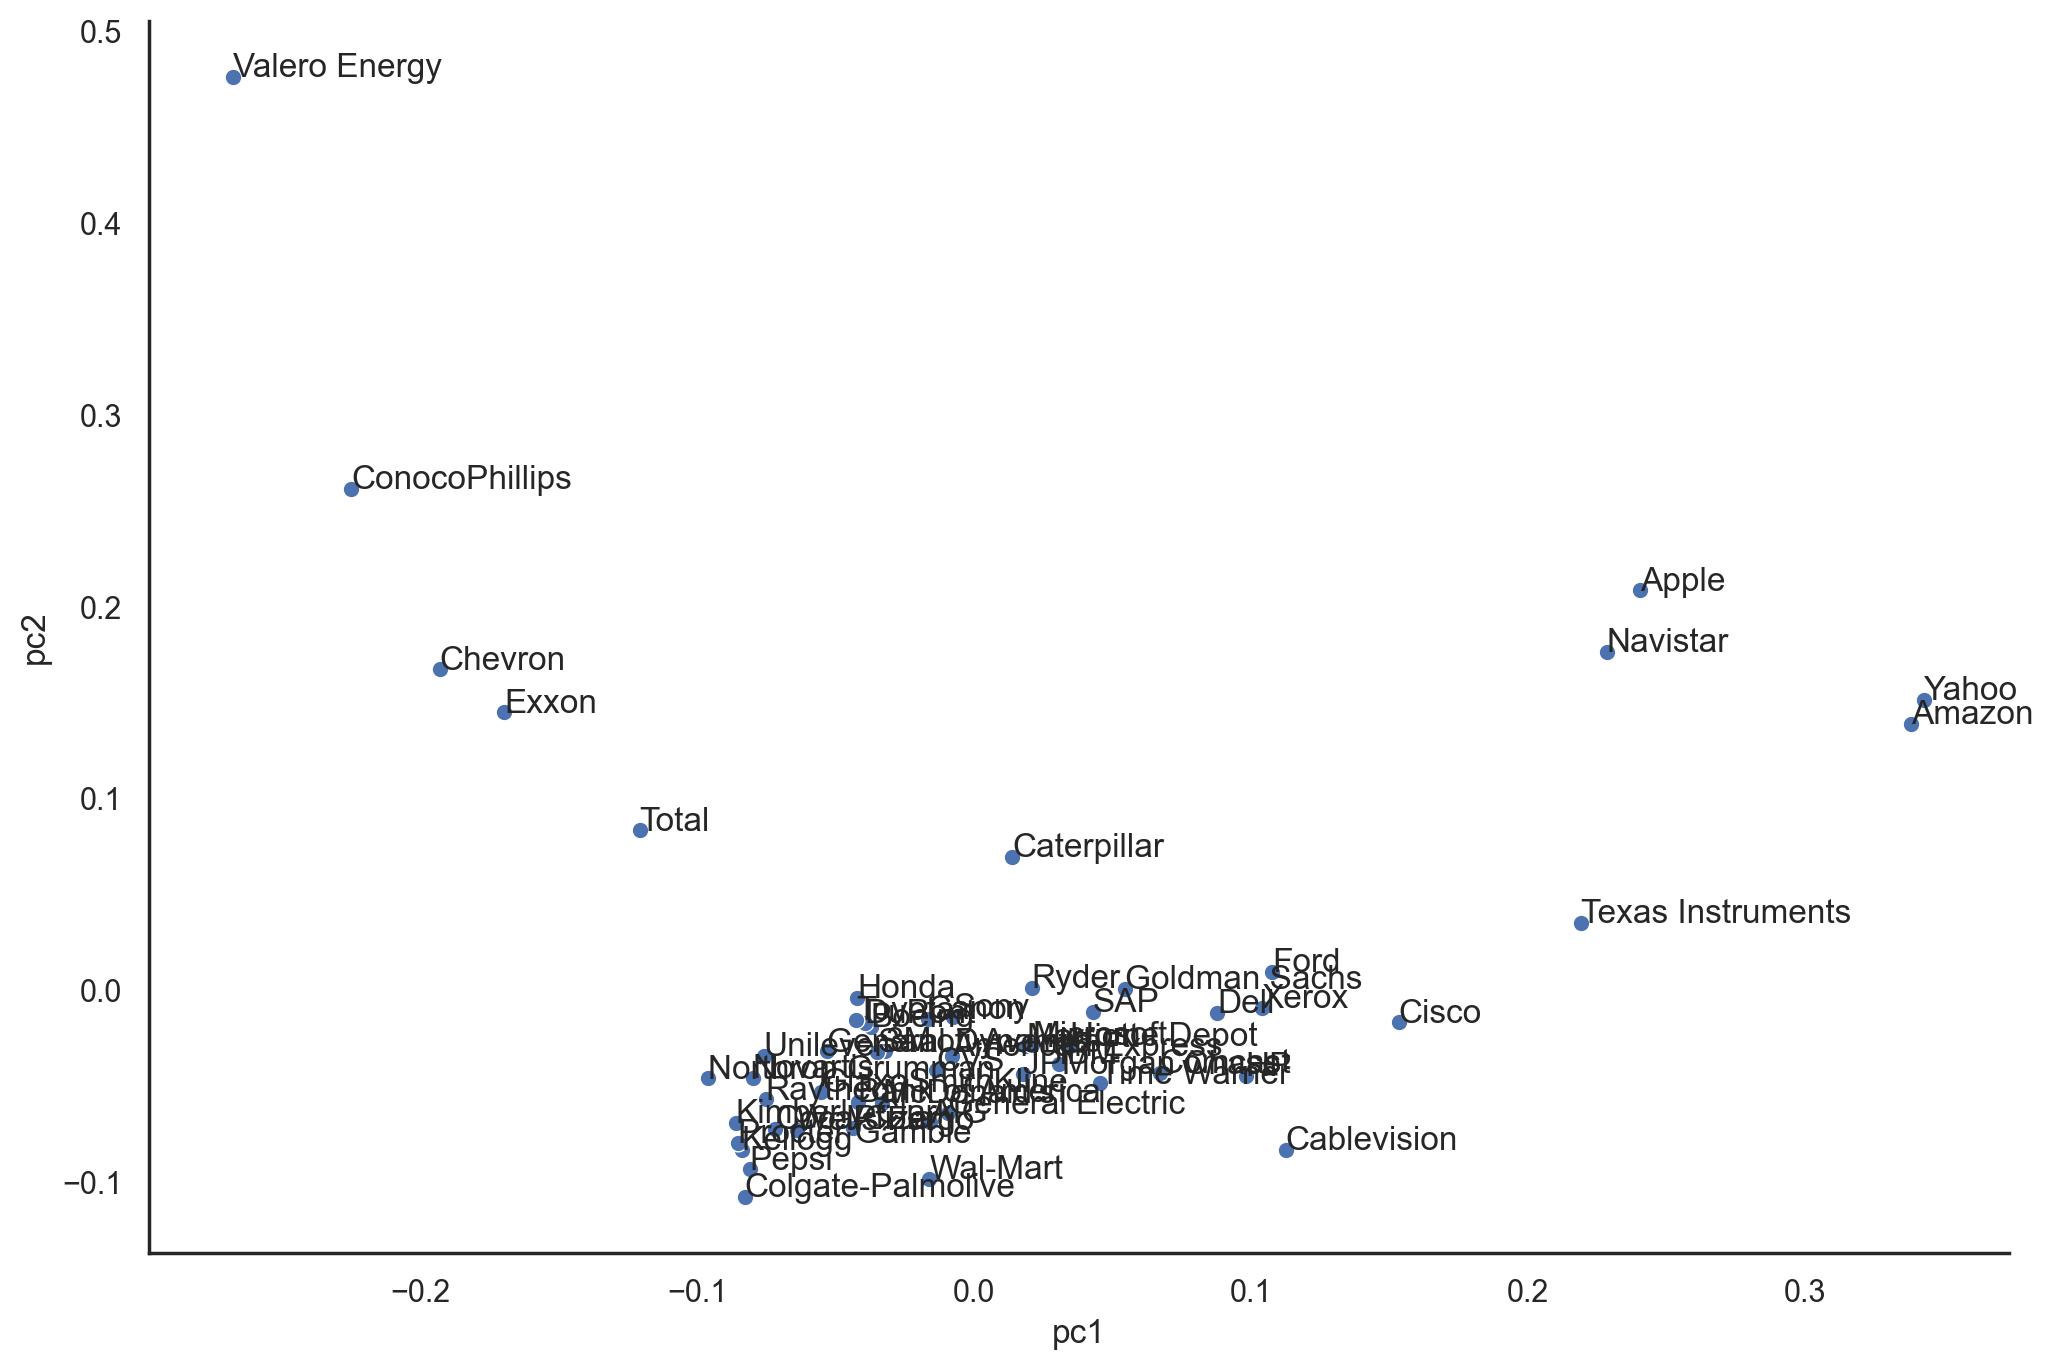

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# call fit_transform on pca
pcs = pca.fit_transform(daily_change)
# transform it into data frame
pcs = pd.DataFrame(pcs,columns=['pc1','pc2'])
pcs.index = daily_change.index
# plot the components
plot_components(pcs)

In [7]:
grader.check("31_plot_pca")

31_plot_pca results: All test cases passed!

### Question 3.2: t-SNE plot

Load the necessary things from scikit-learn, do the data transform, use the helper function to plot the results

Use a `random_state=99` and explore the following values for `perplexity`: 5, 20, and 40 (and any others you feel like)

_Points:_ 0.25

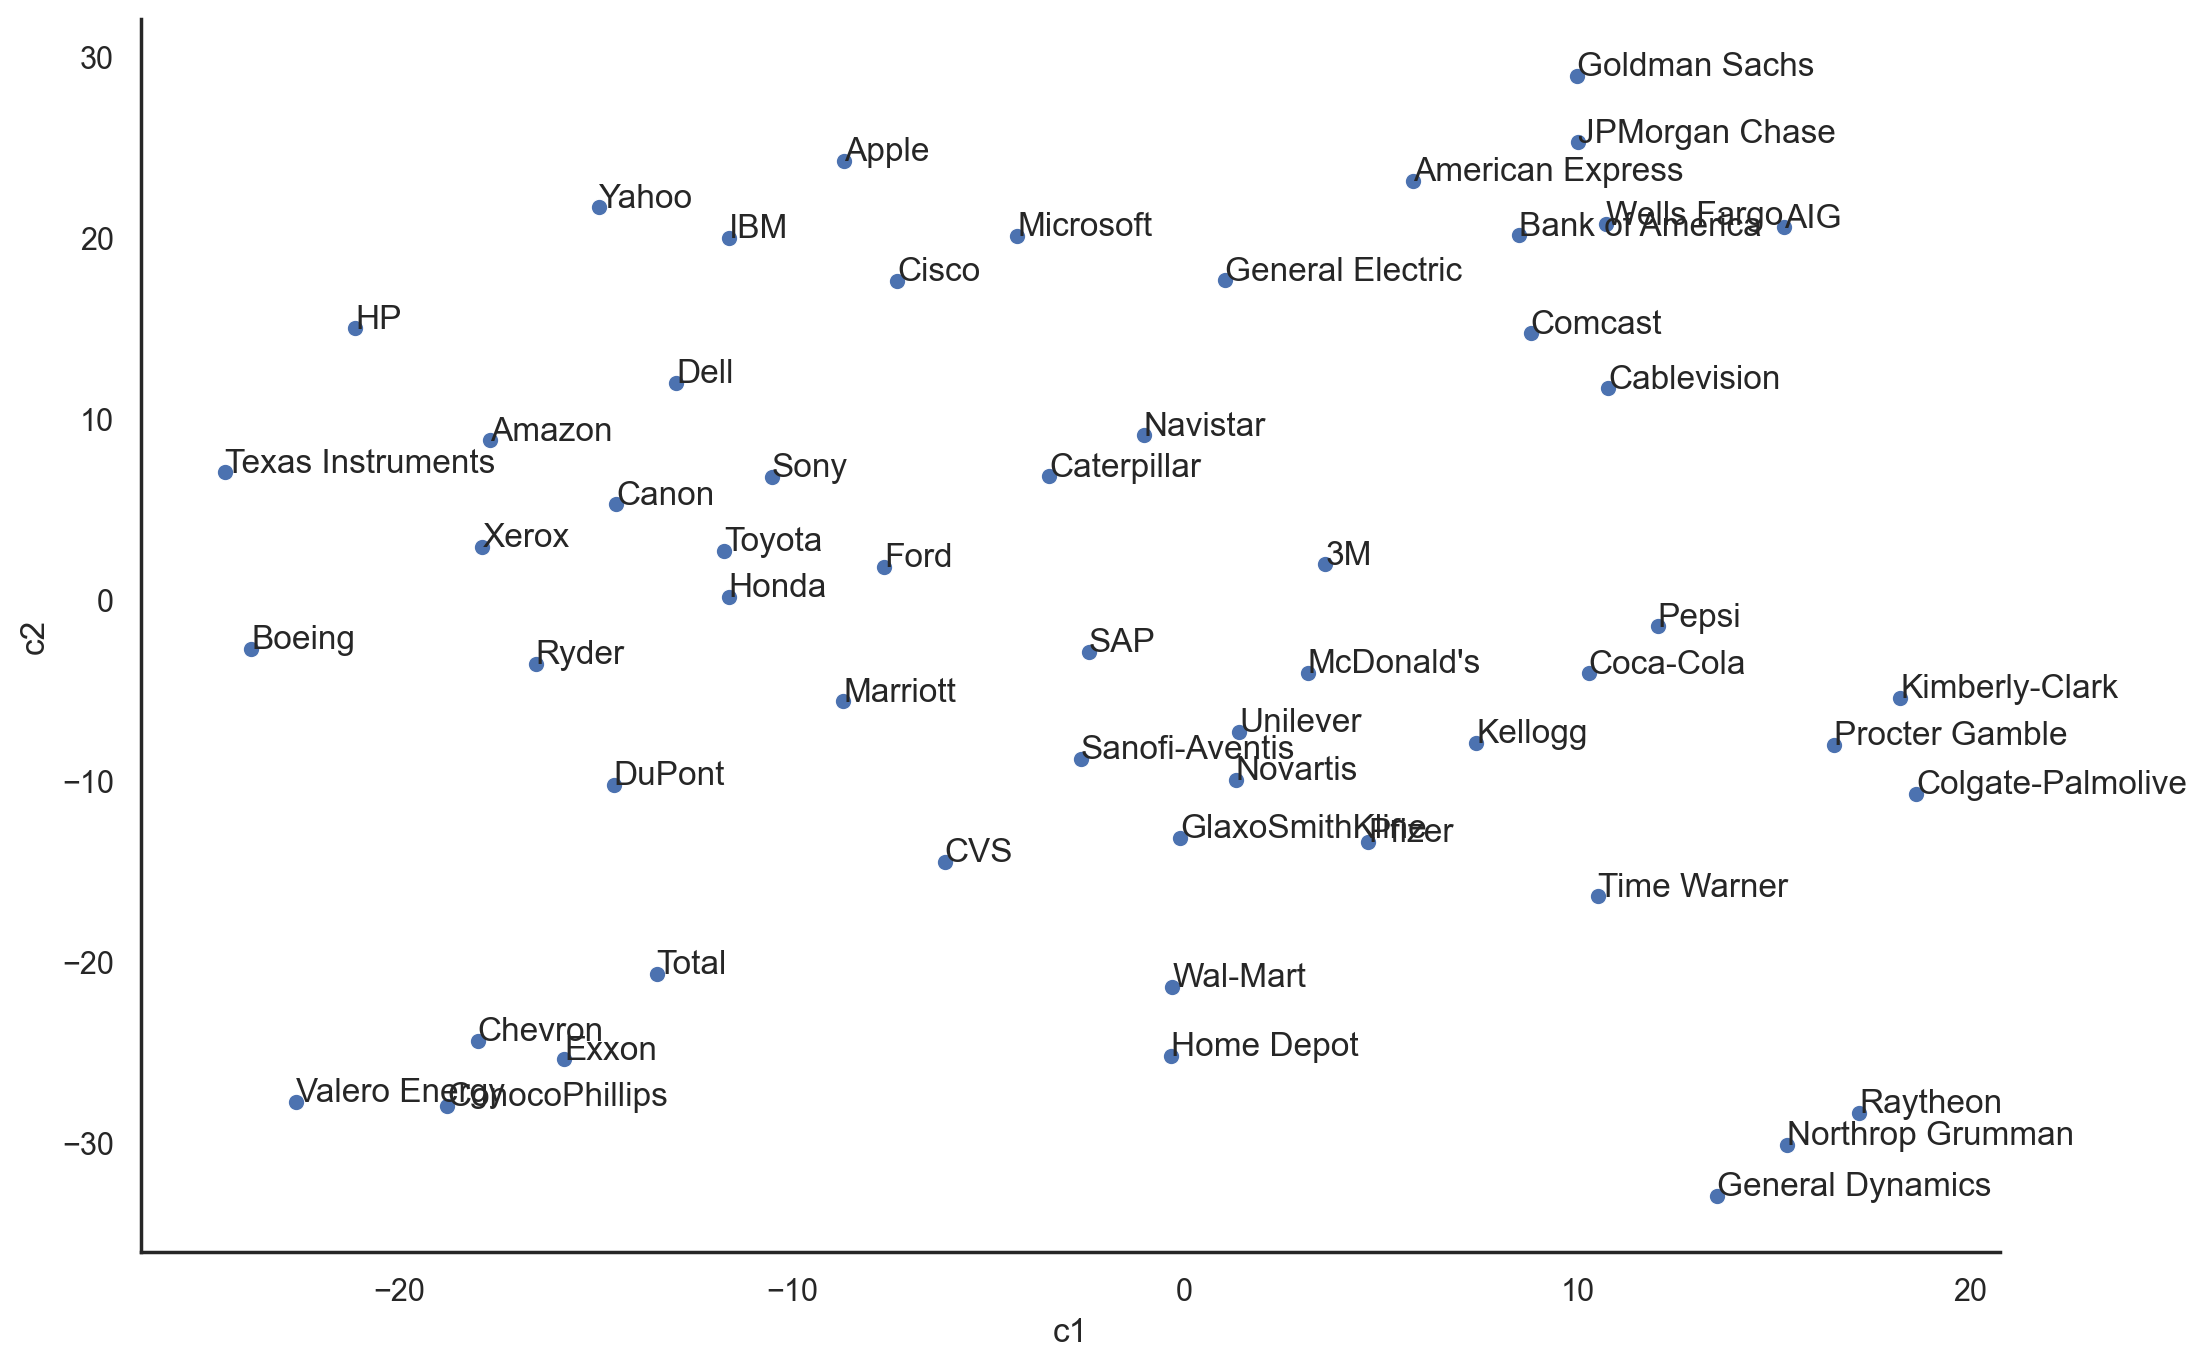

In [8]:
from sklearn.manifold import TSNE

tsne_perp_5 = TSNE(perplexity=5,
                   random_state=99)
tcs = tsne_perp_5.fit_transform(daily_change)
# construct the data frame
tcs = pd.DataFrame(tcs,columns=['c1','c2'])
tcs.index = daily_change.index

plot_components(tcs,'c1','c2')

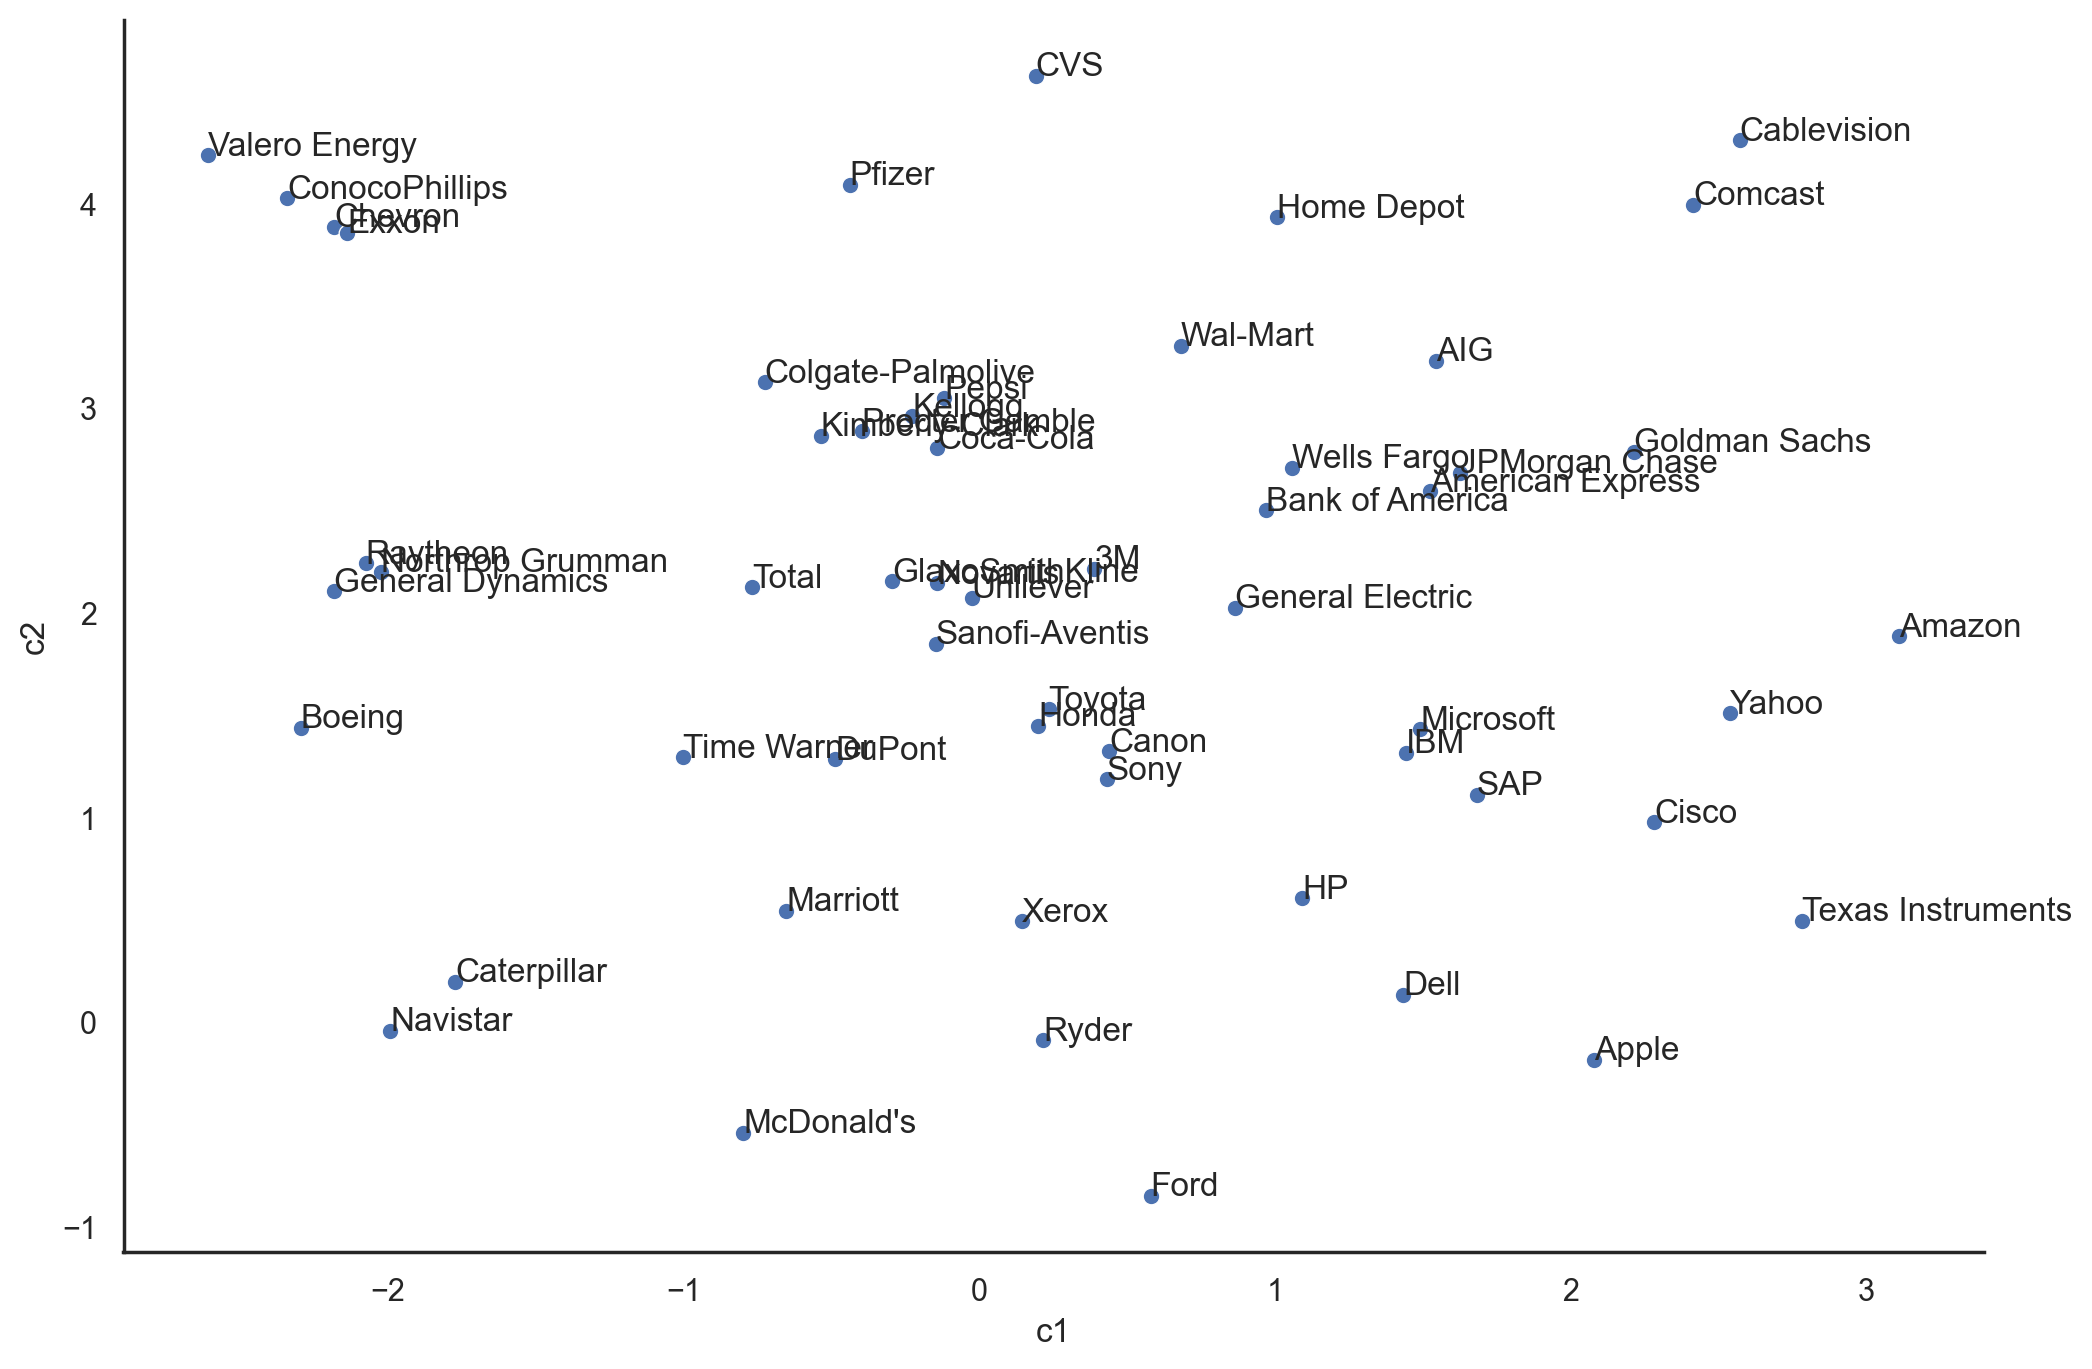

In [9]:
tsne_perp_20 = TSNE(perplexity=20,
                   random_state=99)
tcs = tsne_perp_20.fit_transform(daily_change)
tcs = pd.DataFrame(tcs,columns=['c1','c2'])
tcs.index = daily_change.index

plot_components(tcs,'c1','c2')

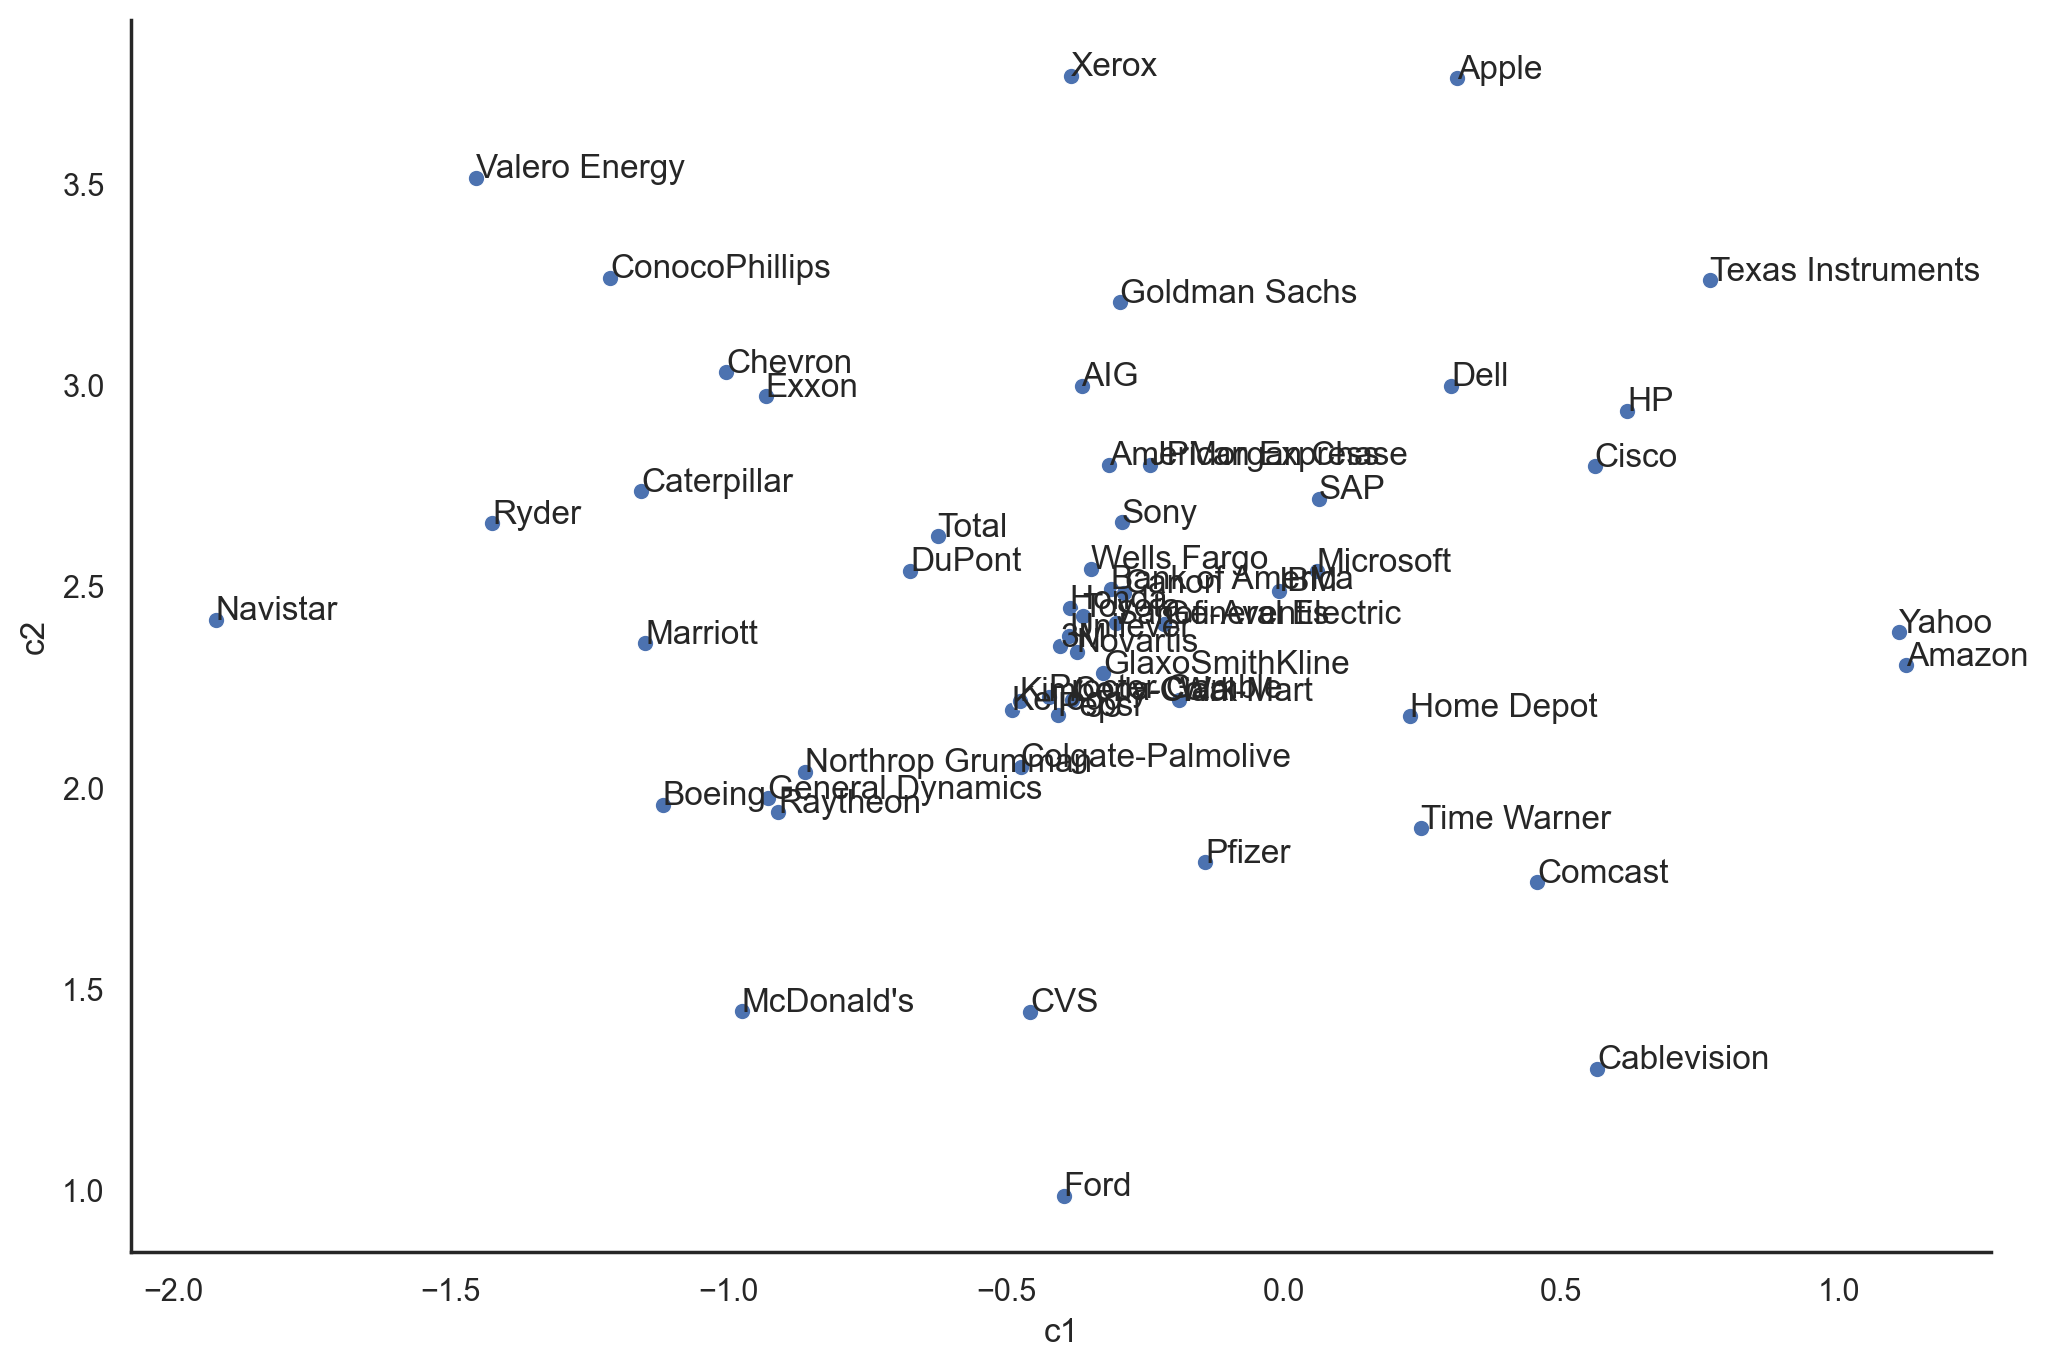

In [10]:
tsne_perp_40 = TSNE(perplexity=40,
                   random_state=99)
tcs = tsne_perp_40.fit_transform(daily_change)
tcs = pd.DataFrame(tcs,columns=['c1','c2'])
tcs.index = daily_change.index

plot_components(tcs,'c1','c2')

In [11]:
grader.check("32_plot_tsne")

32_plot_tsne results: All test cases passed!

### Question 3.3: UMAP plot

Load the necessary things from umap, do the data transform, use the helper function to plot the results

Use a `random_state=99` and `min_dist=0.1` and explore the following values for `n_neighbors`: 5, 20, and 40 (and any others you feel like)

You'll probably want to take a look at the UMAP docs: https://umap-learn.readthedocs.io/en/latest/parameters.html



_Points:_ 0.25

In [12]:
from umap import UMAP

/Users/olimpiacarrioli/Assignments_WI24-1/COGS118B_venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


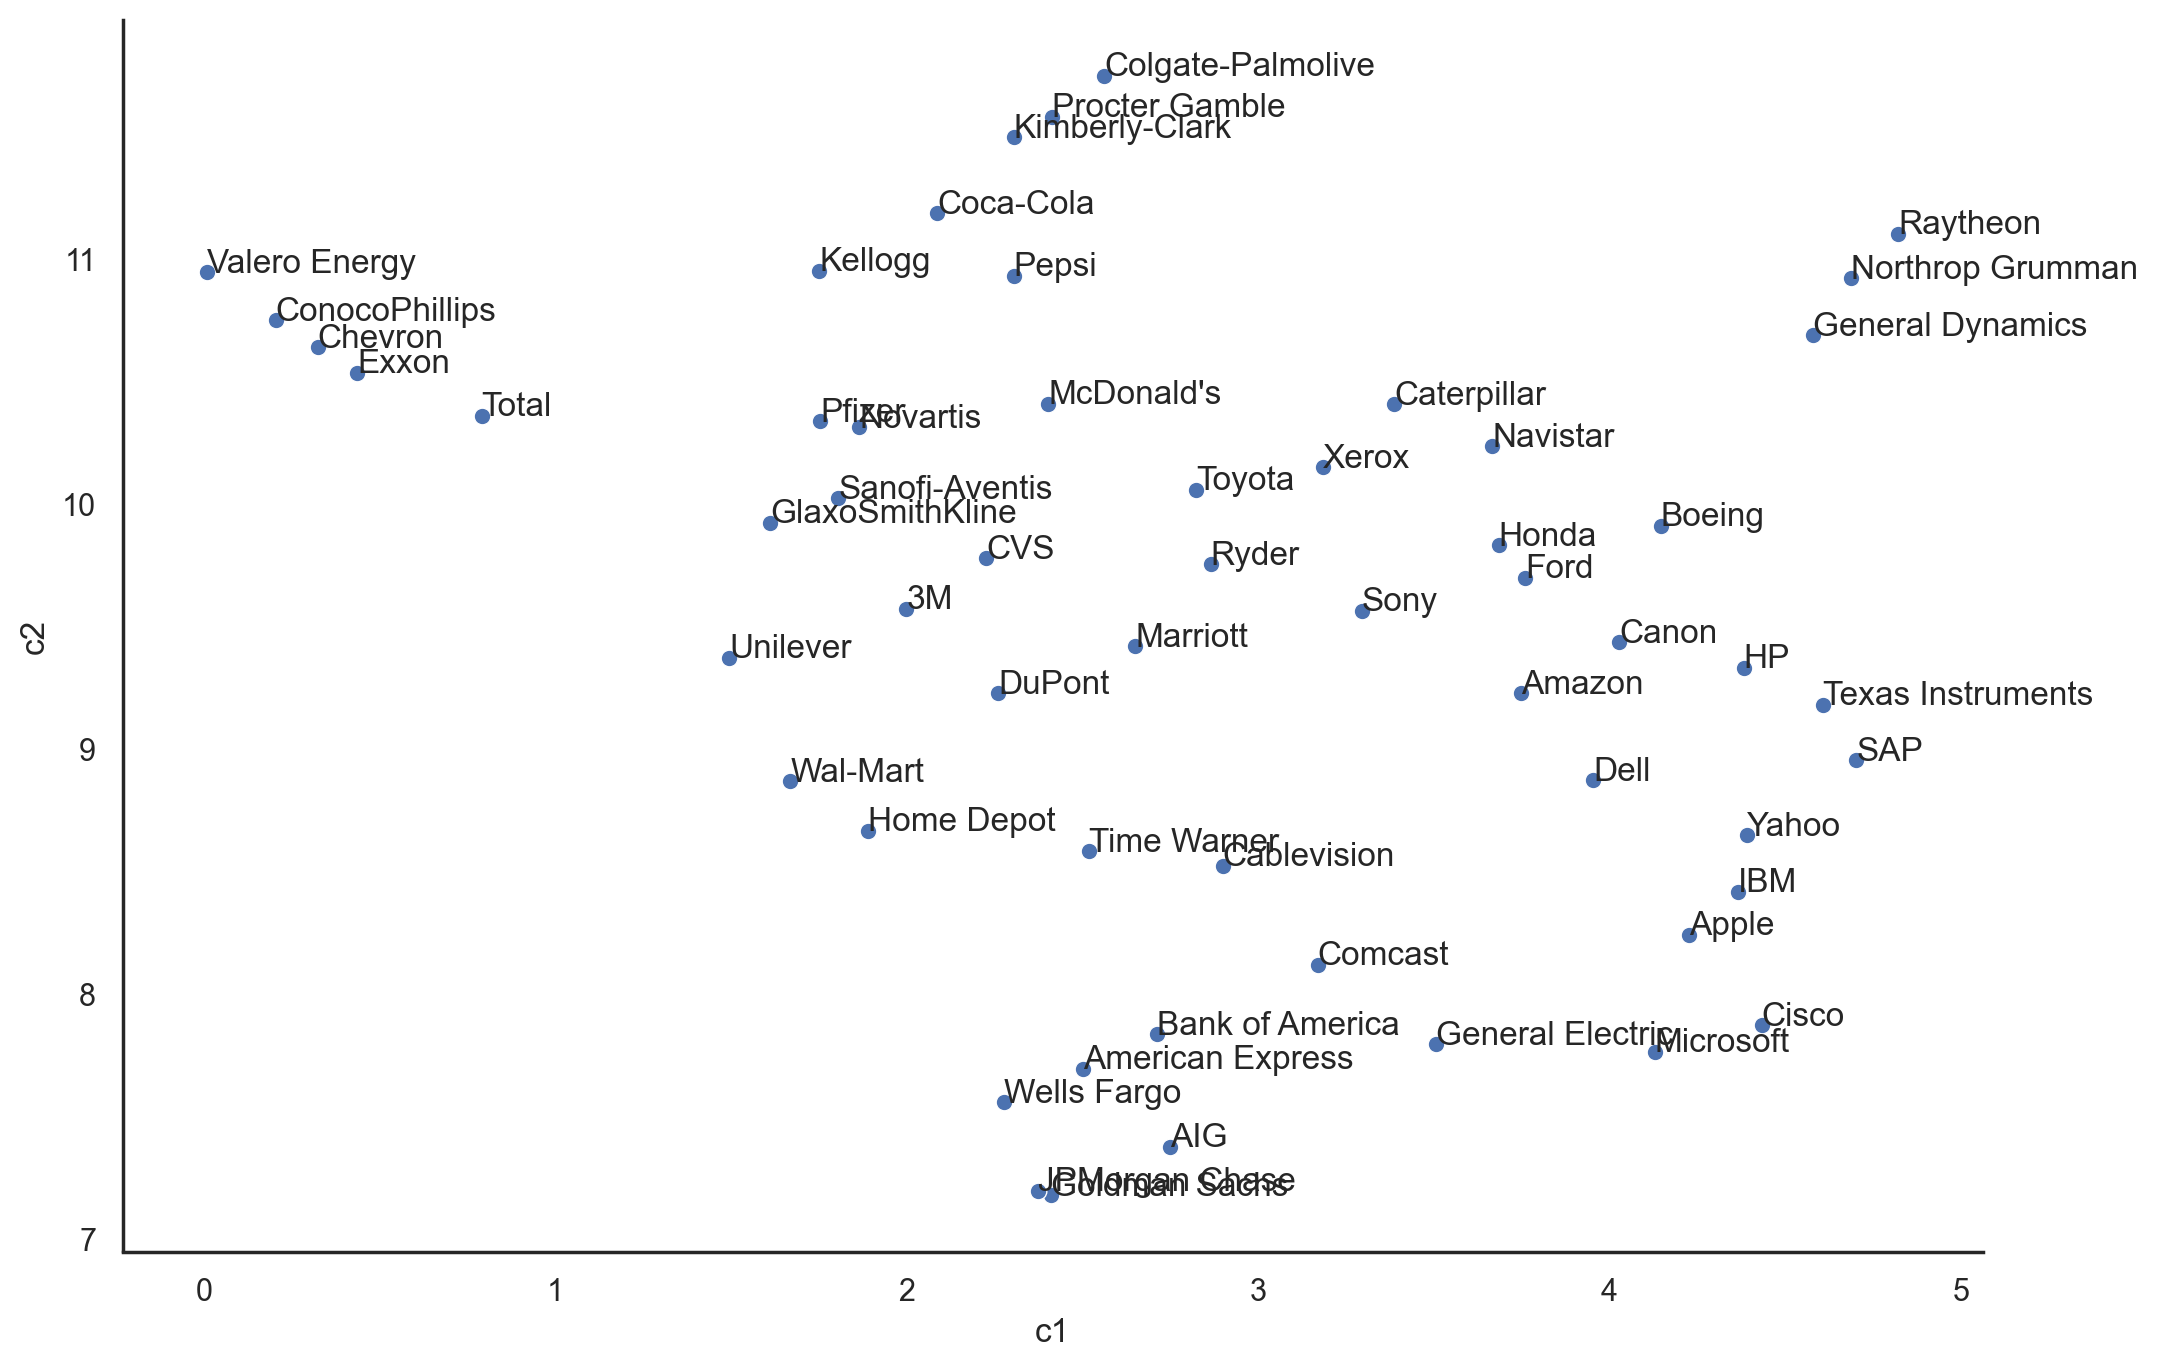

In [13]:
umap_5_neigh = UMAP(n_neighbors=5,
                    min_dist=0.1,
                    random_state=99)
ucs = umap_5_neigh.fit_transform(daily_change)

ucs = pd.DataFrame(ucs,columns=['c1','c2'])
ucs.index = daily_change.index
plot_components(ucs,'c1','c2')

/Users/olimpiacarrioli/Assignments_WI24-1/COGS118B_venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


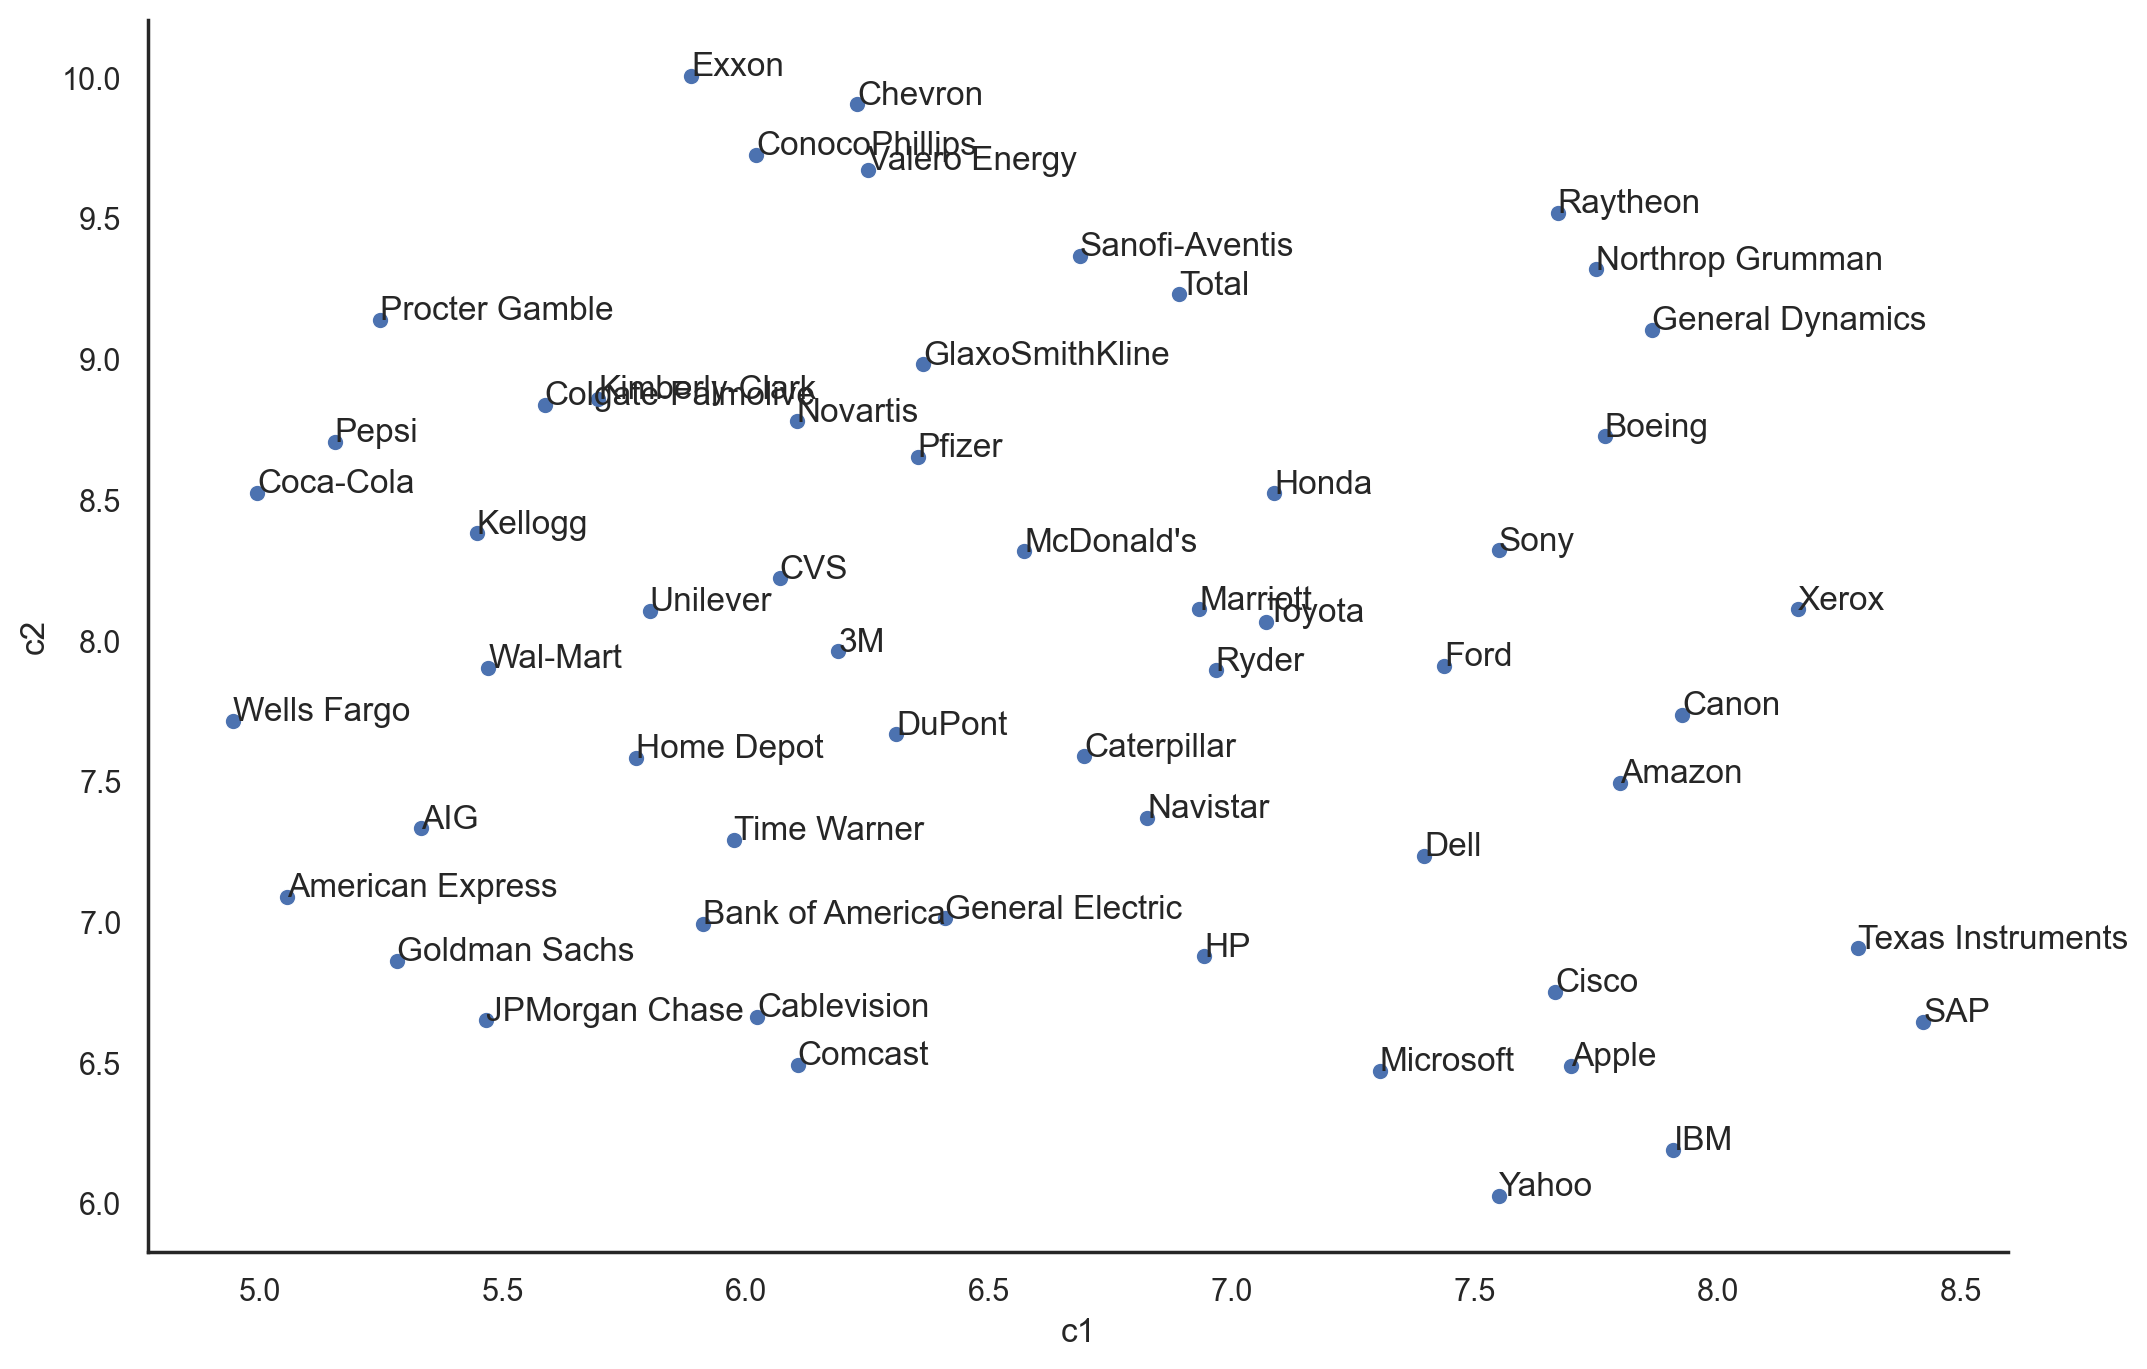

In [14]:
umap_20_neigh = UMAP(n_neighbors=20,
                    min_dist=0.1,
                    random_state=99)
ucs = umap_20_neigh.fit_transform(daily_change)

ucs = pd.DataFrame(ucs,columns=['c1','c2'])
ucs.index = daily_change.index
plot_components(ucs,'c1','c2')

In [15]:
daily_change.shape

(56, 1258)

/Users/olimpiacarrioli/Assignments_WI24-1/COGS118B_venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


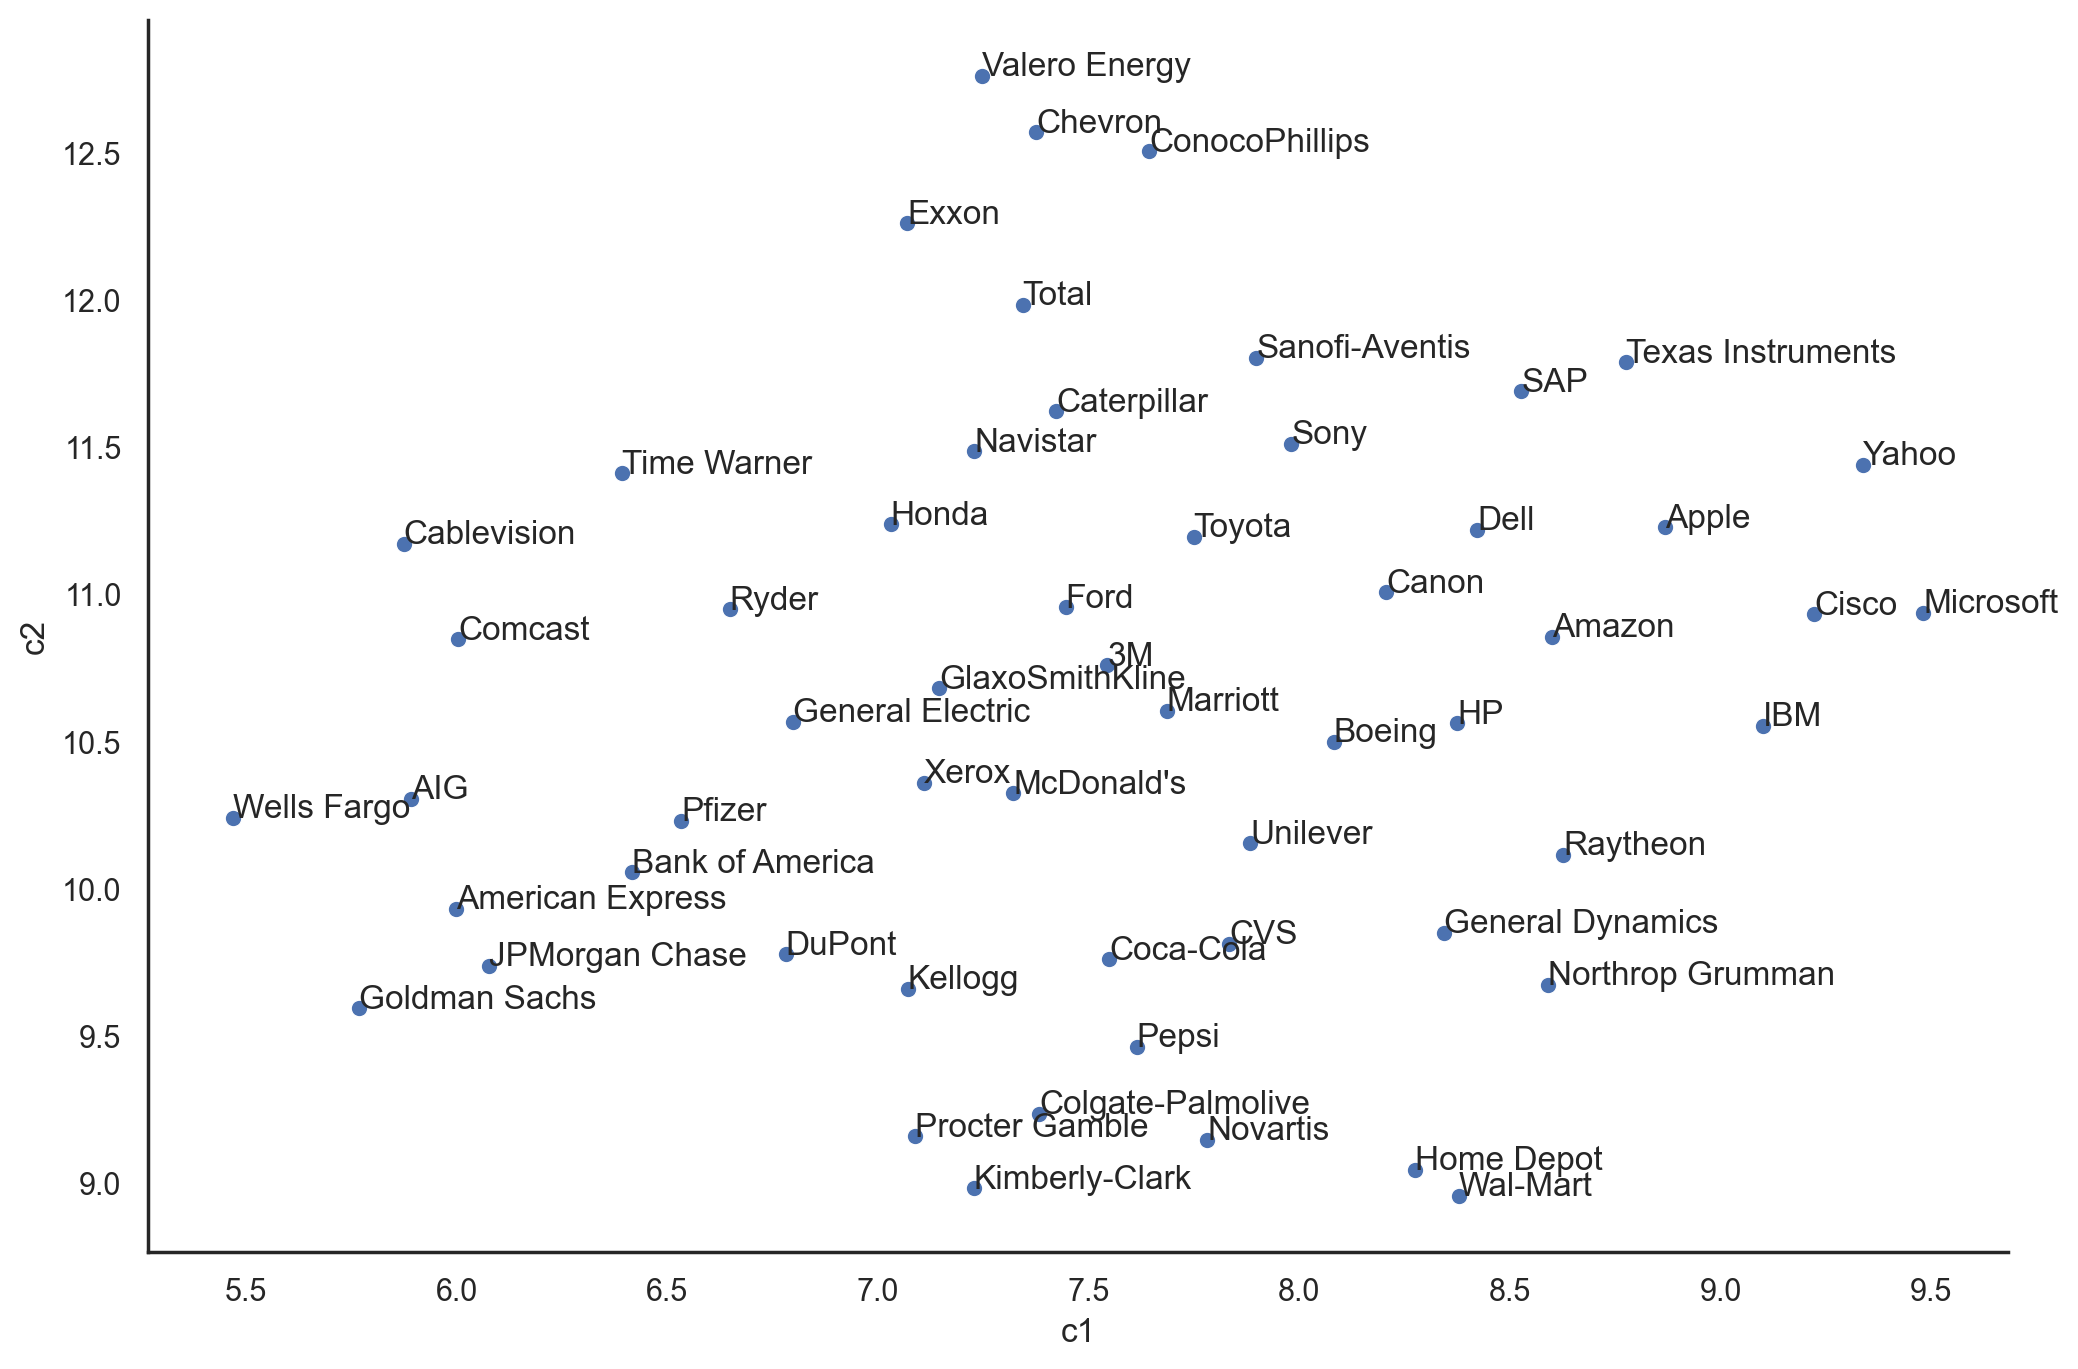

In [16]:
umap_40_neigh = UMAP(n_neighbors=40,
                    min_dist=0.1,
                    random_state=99)
ucs = umap_40_neigh.fit_transform(daily_change)

ucs = pd.DataFrame(ucs,columns=['c1','c2'])
ucs.index = daily_change.index
plot_components(ucs,'c1','c2')


In [17]:
grader.check("33_plot_umap")

33_plot_umap results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 3.4: Compare and discuss

Let's discuss what you saw with the various plots. 

Particularly we are looking to see how companies appear to be similar to each other in the reduced dimensions.  If two companies are near each other in low-d assumedly their stocks move up and down together. This might happen because they are in the same industry and there are good weeks and bad weeks for oil stocks that are different than good/bad weeks for tech stocks.  But industry isn't everything; clearly inside an industry there could be companies doing well while others do poorly. So looking for clusters of industry is simply something I assume might be there, but doesn't have to be. Think of this as the default "pattern" I'm asking you about in the questions below.

**NOTE:** I'm not a broker or an economist, so there are probably other reasons for companies clustering together or separating from each other. If you have particular expertise or are gung-ho to do some research about these companies in this time period I'm curious to see what other things you come up with. So hit me with your best explanations for why "patterns" exist in the low-d data! Think of this as a mini project... this is the kind of subject matter expertise that you will need to bring to your projects :)

So in the Markdown box below please address the following questions in a short essay format. _Your response should probably be 1 (and no more than 2!) paragraphs per bullet point below._ 
- Characterize what the PCA plot looks like, say what patterns you can see
- Characterize differences among t-SNE plots, say what patterns you can see. Talk about how these patterns appear/disappear/modify with the different parameters. Relate these pattern changes to what you know about the nature of high and low perplexity
- Characterize differences among UMAP plots, say what patterns you can see. Talk about how these patterns appear/disappear/modify with the different parameters. Relate these pattern changes to what you know about the nature of high and low n_neighbors
- Why didn't I ask you to investigate even larger values for perplexity or n_neighbors, like e.g. 100? What happens when you try that with the algorithm?
- What differences do you see in the plots between the 3 algorithms? Do you feel like there's a strong reason to prefer one of these algorithms? Reasons might include results, computational complexity, hyper-parameter tuning, and anything else you feel is relevant
- Given what you've seen here, what conclusions do you feel comfortable drawing about these stocks and why? What else do you suspect but would feel like you can't prove given this analysis?


_Points:_ 3.25

1. In the PCA plot there is a dense cluster of companies near the origin, which includes car manufactures, banks, retail companies, and food industry companies. 2 other cluster are identifiable in the plot: one in the positive direction of the first PC (tech companies like Amazon and Apple) and another one in the positive direction of the second PC (oil/energy companies like Chevron and ConocoPhilips). It might be the case that tech companies, overall, had a rising in stock prices during 2003-2007, corresponding to the years prior the launch of the first iPhone. This rising was probably slow and mild because of the necessary recovery from the dot-com crush of the 2000s. Oil and energy-related stocks, however, had an extreme rise during the same years, with crude oil prices going from 30$ in 2003 to 90$ in 2007. Lastly, the companies clustered in the center of the plot were likely stable during these years because they are well-affirmed and have a consolidated market.  

2. In the first t-SNE plot (`perplexity=5`) similar companies are in the same part of the plot, but they are not unequivocally clustered. These including: energy/oil companies, banks, tech companies, food and beverages companies, and car manufacturers. At a first glance, indeed, the plot resembles a uniform distribution
In the second t-SNE plot (`perplexity=20`) there are a few apparent clusters: energy companies (Chevron, Exxon etc.) banks (Goldman Sachs, JP Morgan etc.), defense companies (Northrop Grumman, etc.) and personal care companies clustered with Pepsi and Coca-Cola. The remaining companies are not tightly clustered and appear uniformly distributed.
In the last t-SNE plot (`perplexity=40`) there is a dense cluster of companies in the center of the plot, with banks, tech companies, pharmaceutical companies, energy providers and even drink-producers. 
These plots reflect the different values of perplexity set in the dimensionality reduction algorithm: low perplexity indicates fewer neighbors/smaller standard deviation, hence less dense clusters; Whereas high perplexity tends to generate bigger clusters. There is a tradeoff between having a perplexity high enough to reach the true neighbors, but not too high to cluster together unrelated companies (as in the last plot).



3. In the first UMAP plot (`n_neighbors=5`), similar companies are close in the plot-space, with a few clear clusters: energy companies, banks, personal care companies and defense companies. In the second UMAP plot (`n_neighbors=20`), similar companies are still relatively close to each other in the plot space, but it is harder to identify well-divided clusters. In the last UMAP plot (`n_neighbors=40`), the overall position of the companies in the plot-space is different, and some clusters become more easy to identify compared to the previous plot (including banks and energy/oil companies). These changes reflect the different values of `n_neighbors`:
    - `n_neighbors=5` makes the algorithm focus on local structures, emphasizing similarities in small neighborhoods, and hence resulting in more well-defined clusters.
    - `n_neighbors=20` forces UMAP to consider more broad structures, but these are not broad enough to capture the overall trends in the data. Hence, the result is random-looking low dimensional embedding with hardly identifiable clusters.
    - `n_neighbors=40` allows UMAP to consider the global structure of the data, since each data point is analyzed in the context of its 40 nearest neighbors. This implementation highlights more general trends in the data, with clusters appearing again, although less separated than the first plot.


4. There are only 56 companies in the dataset `daily_change`, therefore a number greater than 55 for `n_neighbors` is meaningless, since there cannot be more than that number of neighbors. Setting `n_neighbors=55`would force UMAP to compare each datapoint to all the other datapoints, and hence attempt to find the most local structure possible - this is in contrast to the purpose of the algorithm itself. If I try to run UMAP with, for example, `n_neighbors=100`, the algorithm itself will point out that the number of neighbors is greater than the number of datapoints, and it will automatically consider only 55 neighbors. 


5. There are clear differences between PCA, t-SNE, and UMAP applied to the `daily_change` dataset:
    - PCA is overall under-performing at maintaining a nuanced representation of the dataset. It creates a big cluster with many different types of companies, but it is a good way to identify very different stock trends (tech companies and energy providers). Nonetheless, PCA is very computational effective and deterministic. 
    - T-SNE is performing decently on this task (especially with perplexity=20), generating meaningful compact clusters, although likely misplacing some companies (for example, in the second t-SNE plot, McDonald’s and Pfizer are far away from all similar companies). T-SNE is also computationally expensive (scales with the square of the dataset size) and highly dependent on the perplexity value.
    - UMAP is performing best at embedding the `daily_change` dataset (especially with `n_neighbors=5`). It largely captures meaningful relationships both locally and globally, generating an overall interpretable plot. UMAP is also faster than t-sne because it scales with the dataset size, although it requires the fine tuning of at least 2 parameters.
    Overall, in this specific context, UMAP is preferable due to its clearer results and computational effectiveness. The hyper-parameter fine-tuning is not problematic since the dataset has only 56 observation, which bounds the number of neighbors to 55. 

6. Overall, there are some common patterns to all three dimensionality reduction algorithms, which suggest that the stocks of these companies are rising or falling together in the years 2003 to 2007. These are: tech companies, oil/gas companies, defense companies, and banks. Tech companies are likely increasing their market value slowly after the dot-com crash and in preparation to the upcoming digital era (release of the iPhone, 2008). Oil and energy companies are increasing their stock value significantly in those years too, more dramatically than tech companies. Defense companies are also experiencing an increase in stock value after the 2001 attacks, and due to the foreign involvement of the United States. The favorable economic climate is leading banks to rapid growth as well, which will come to an abrupt end with the 2008 financial crisis. The fact that these sectors are in different clusters likely represents different rates of stock prices change. 

    As for the remaining companies, there is some ambiguity. Some of them are clustered by UMAP but not by t-SNE (for example McDonald’s), making it hard to draw conclusions about their stock prices. It could be the case that these companies experience their own trajectory in the market, although it is impossible to determine using dimensionality reduction algorithms. 


<!-- END QUESTION -->

## Question 4: Use UMAP as the Basis for a Supervised Classifier

Heres an example of how to use UMAP as the input to a supervised learning classifier... You'll have to look some stuff up about UMAP https://umap-learn.readthedocs.io/en/latest/transform.html and k-Nearest-Neighbors https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

In this example, we will:

- get the full 70k sample x 784 dimension MNIST dataset
- create a pipeline to 
    - make a dimension reduction using UMAP down to a 2 dimension embedding
    - use a k-Nearest Neighbors classifier in that 2d embedding to classify digits
- visualize the results of the predictions in the embedding 

Some interesting notes on this process:

- UMAP and kNN are similar in that large numbers of neighbors produces smoother results.. more global relationships for UMAP and more smooth decision boundaries for kNN. Both of these are _VERY_ dependent on hyperparameters!
- We are setting you up with a pipeline version of this process in order to facilitate you doing some hyperparameter selection in the next question.

In [18]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml

from umap import UMAP

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
sns.set_theme()

# fetch dataset
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(int)

/Users/olimpiacarrioli/Assignments_WI24-1/COGS118B_venv/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [19]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [20]:
# 50/50 train test split on just the first 10k digits to keep things speedy
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data[:6000], mnist.target[:6000], test_size=0.5
)

# arbitrary parameters, feel free to play with this
trans = UMAP(n_neighbors=5, min_dist=0.1)
knn = KNeighborsClassifier(n_neighbors=5)

pipe = Pipeline([
    ('dim_reduce', trans),
    ('classifier', knn)
])

pipe.fit(X_train,y_train)

Pipeline(steps=[('dim_reduce',
                 UMAP(n_neighbors=5, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})),
                ('classifier', KNeighborsClassifier())])

In [21]:
y_test.value_counts().sort_values()

class
0    267
5    268
8    272
6    292
2    296
9    302
7    305
3    325
4    330
1    343
Name: count, dtype: int64

In [22]:
# this is how you can extract the embedding from the training set data
# .steps is a list of the steps of the pipeline
# [0] is the first one (dimred)
# which yields the dimreduce tuple from the Pipeline command, 
# [1] is the actual umap class while [0] is just the name
# finally inside the umap instance .embedding_ is the transformed training data
embedding_train = pipe.steps[0][1].embedding_

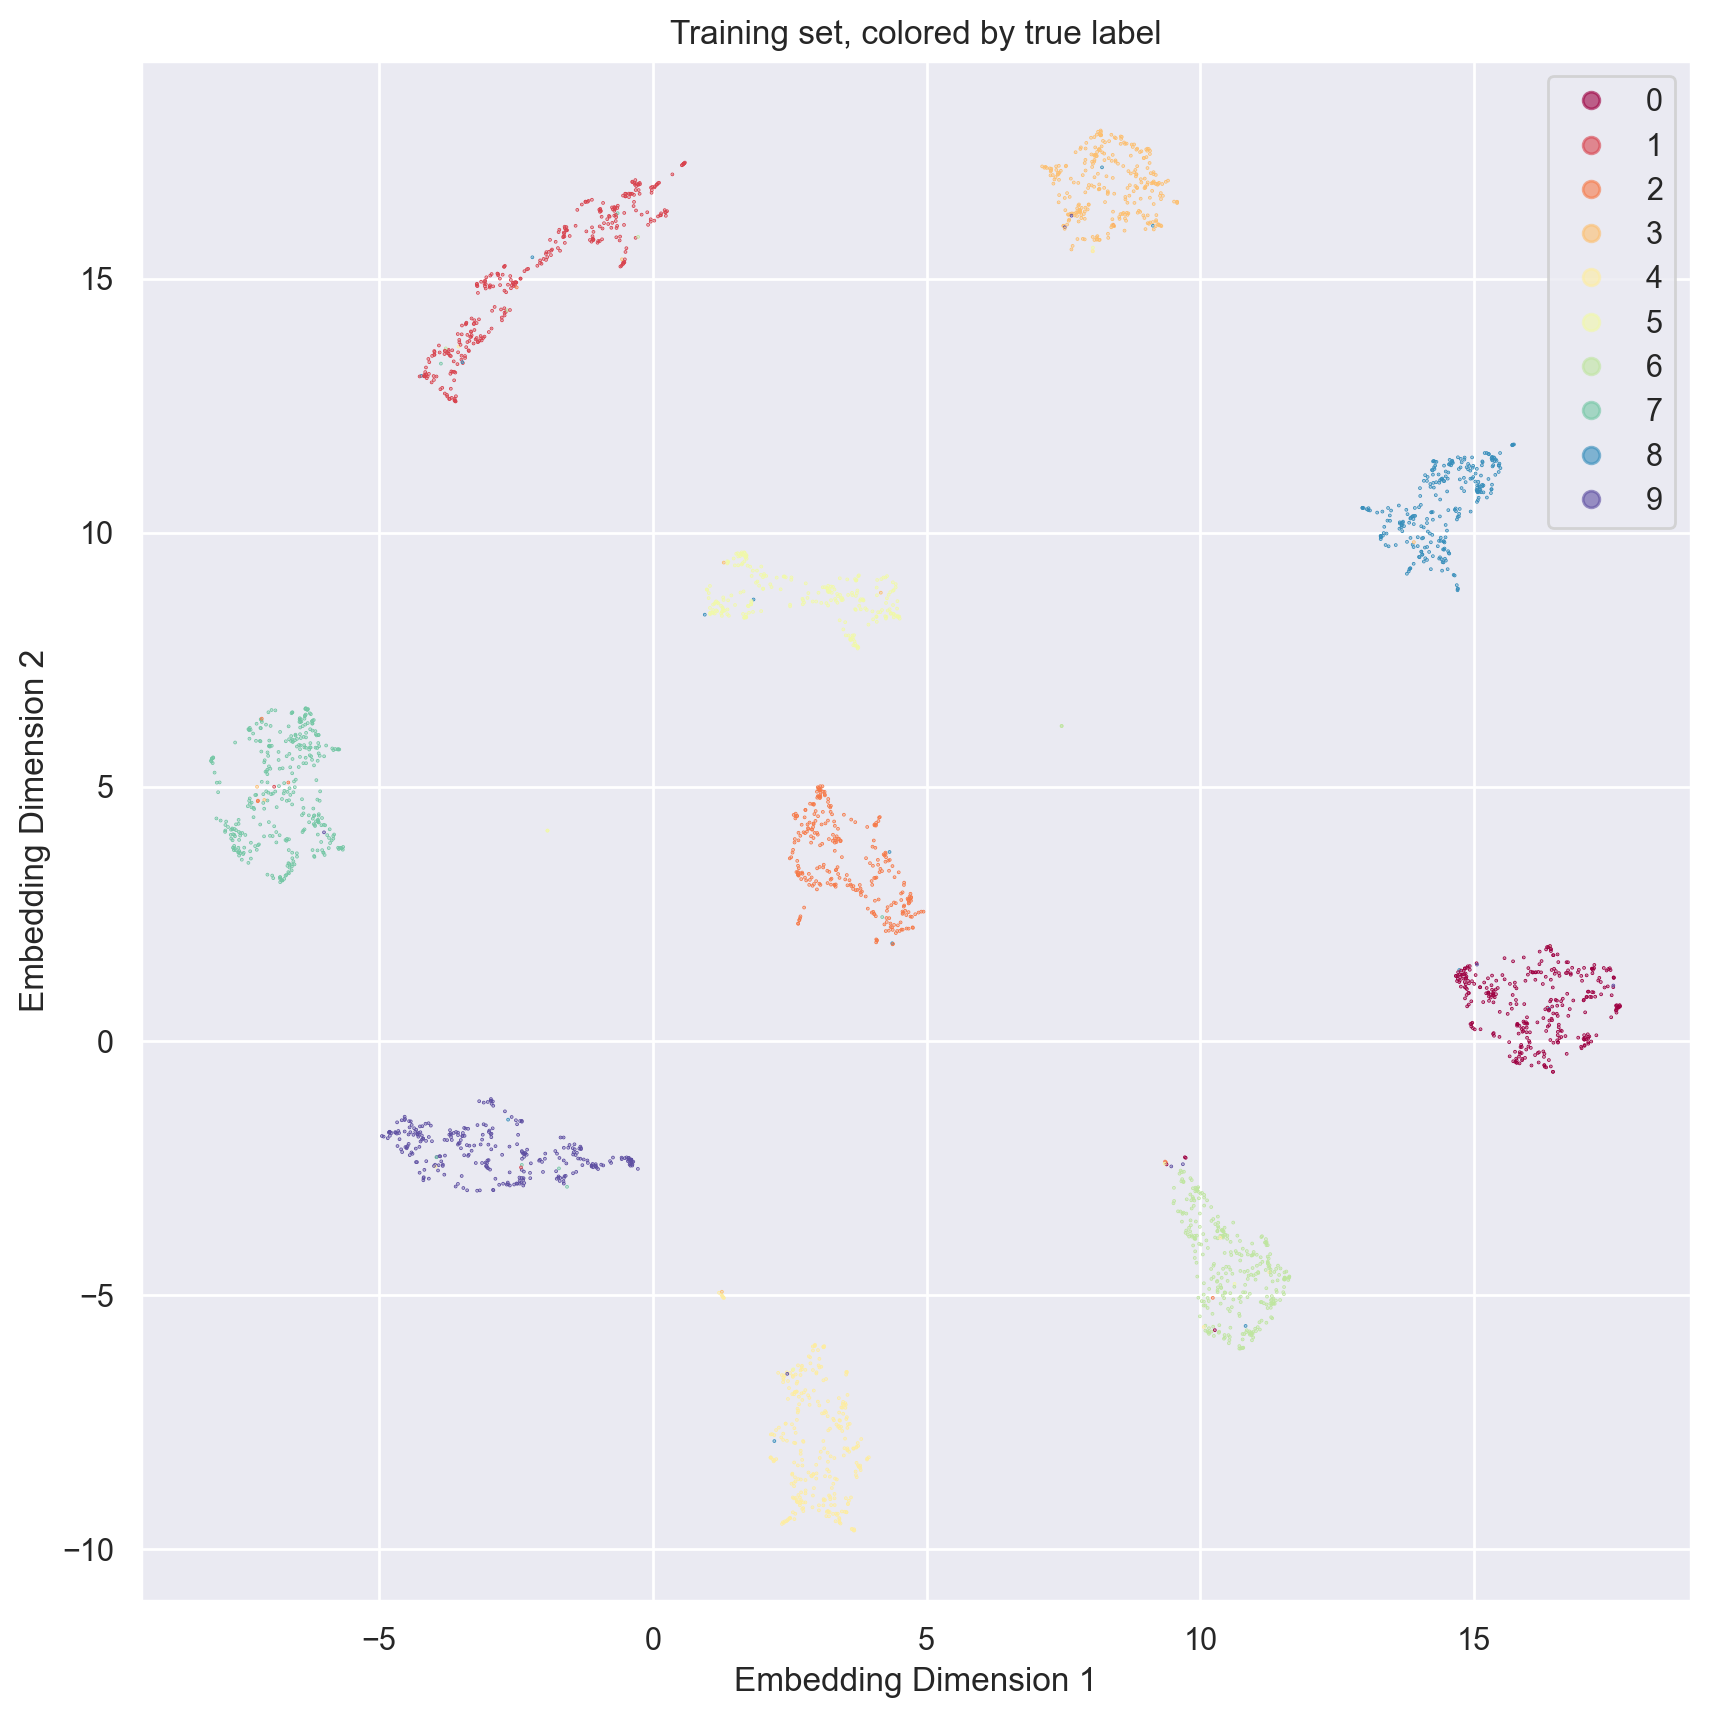

In [23]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(embedding_train[:, 0], embedding_train[:, 1], c=y_train.astype(int), s=0.1, cmap='Spectral')
handles, _ = scatter.legend_elements(prop="colors", alpha=0.6) # use my own labels
legend1 = plt.legend(handles, np.arange(0, 10))
plt.title('Test set, colored by prediction');
plt.title('Training set, colored by true label')
plt.xlabel("Embedding Dimension 1")
plt.ylabel("Embedding Dimension 2");

### Question 4.1: Make a prediction on the test set

_Points:_ 1

In [24]:
# how can we now get predictions from the fitted pipeline? basic scikit-learn usage!
prediction = pipe.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       267
           1       0.87      0.99      0.93       343
           2       0.94      0.89      0.91       296
           3       0.93      0.89      0.91       325
           4       0.95      0.86      0.91       330
           5       0.90      0.88      0.89       268
           6       0.96      0.99      0.97       292
           7       0.94      0.93      0.93       305
           8       0.95      0.86      0.90       272
           9       0.84      0.91      0.87       302

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [25]:
grader.check("41_UMAP_Basis")

41_UMAP_Basis results: All test cases passed!

In [26]:
# to get the test set embedding we need must explictly call dimred.transform() on the test data
# to call dimred.transform() we use the pipe.steps trick again

# note this .transform() is an approximation!!!
# The vanilla UMAP cannot transform test data its never seen, because the embedding is produced
# during a gradient descent process. However there is various black magic being done here
# where another supervised algorithm is trained to try to go from original training data to 
# the low d embedding, and that supervised algorithm is used to transform the test data
# if you're interested here's discussions of HOW this black magic happens https://github.com/lmcinnes/umap/issues/40

embedding_test = pipe.steps[0][1].transform(X_test) 

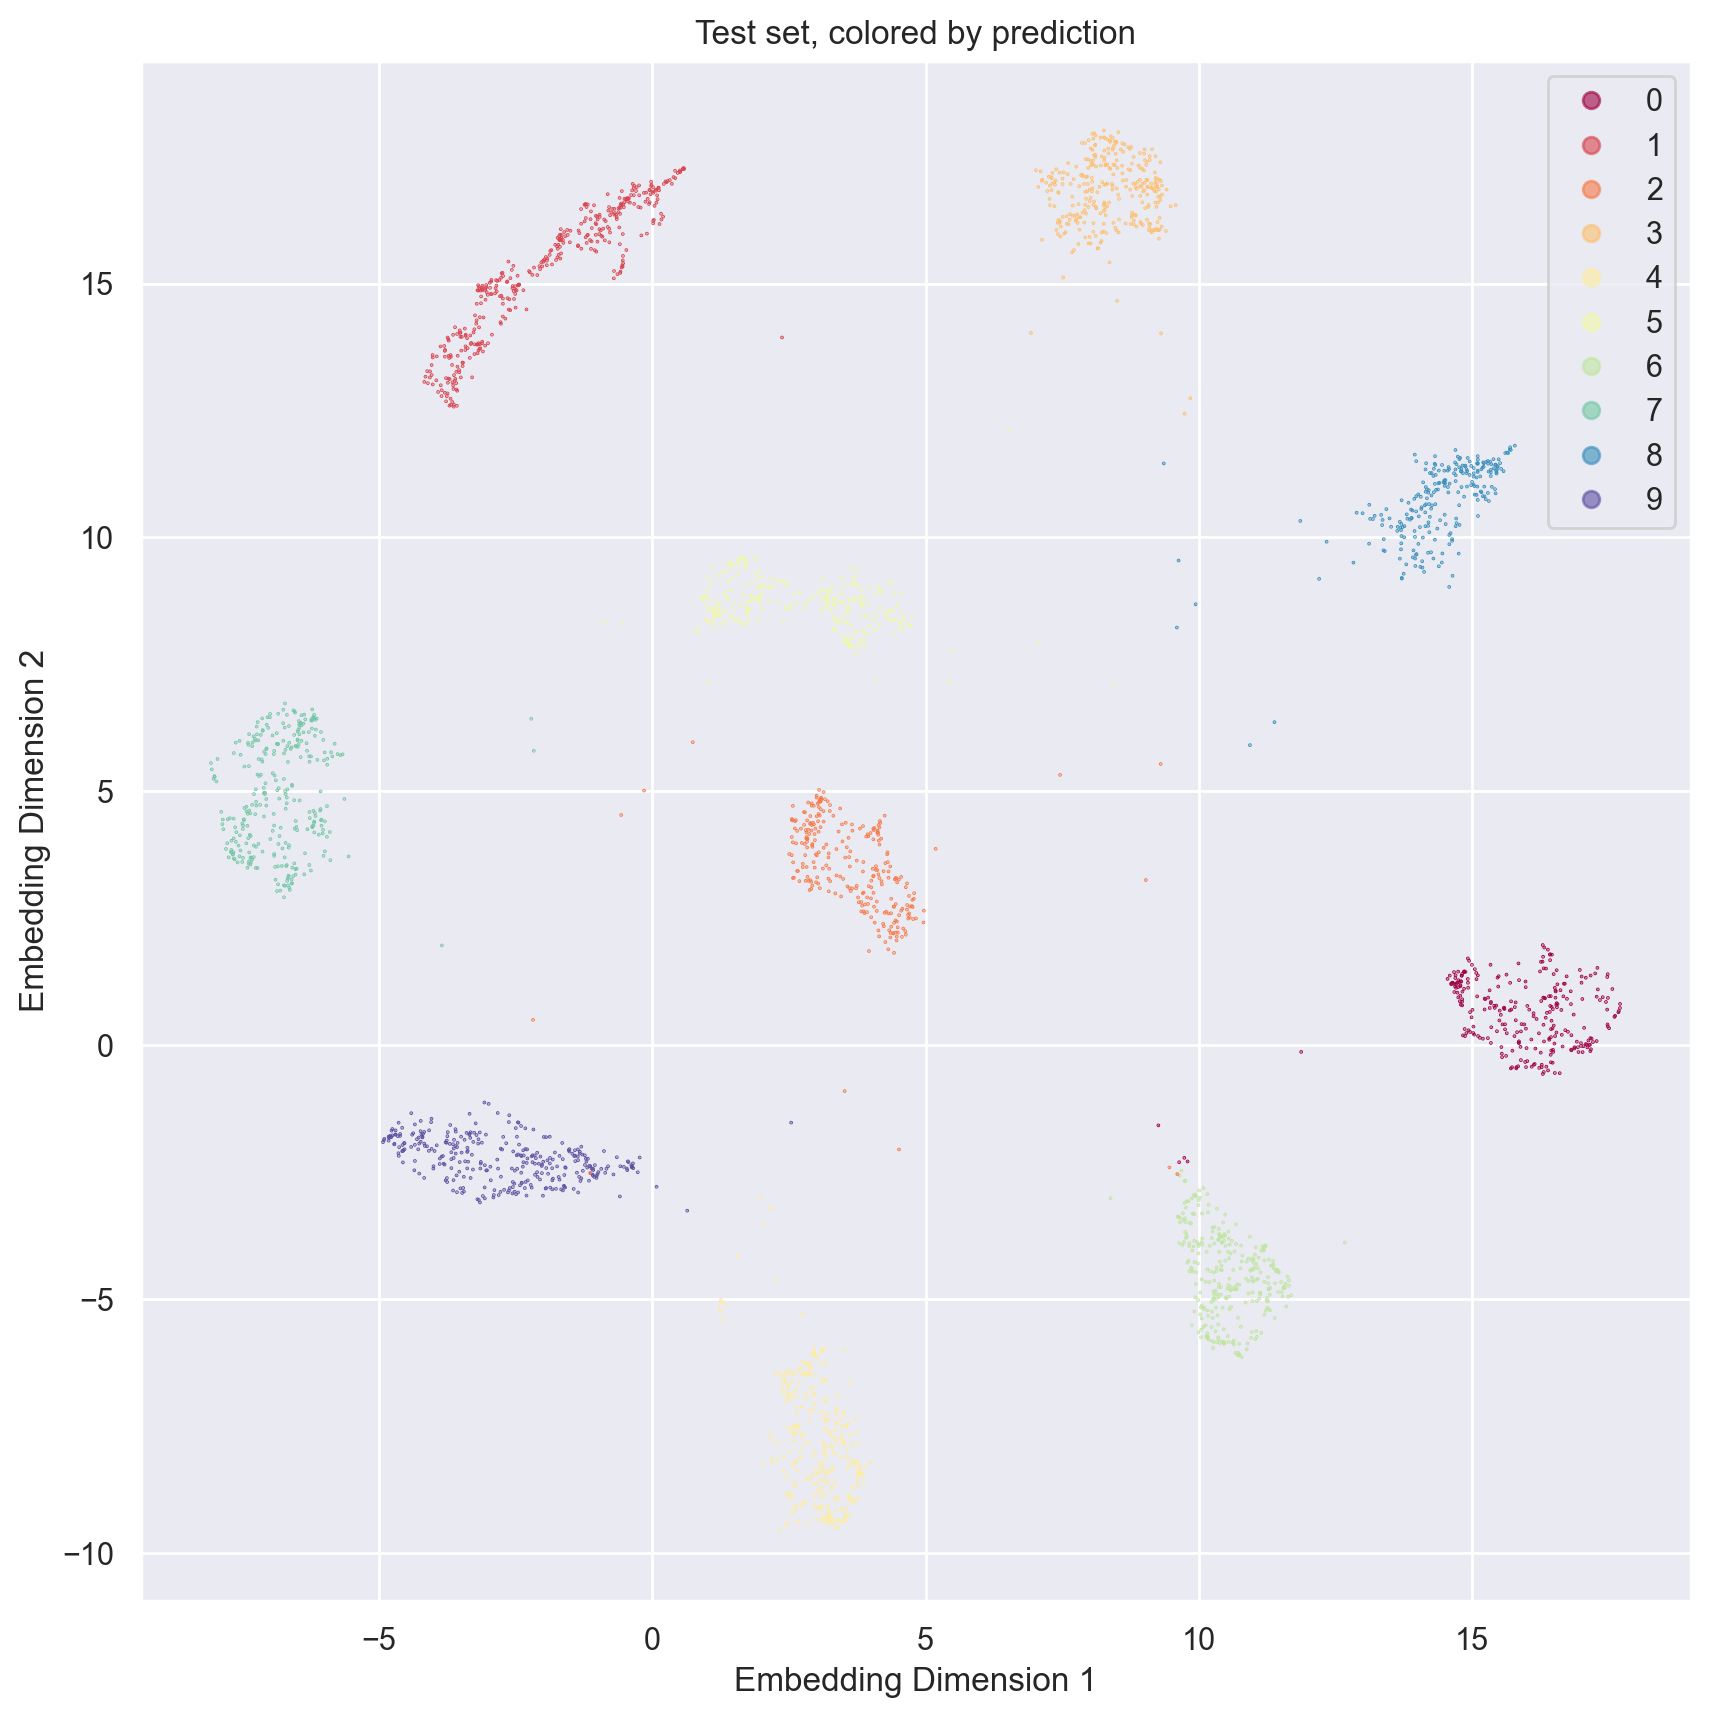

In [27]:
# look at all that salt and pepper in scatter dots in between the "clusters"
# these are "outlier" digits that don't really look like anything in the training data
# so they really don't fall where other digits of that label did
plt.figure(figsize=(10, 10))
scatter = plt.scatter(embedding_test[:, 0], embedding_test[:, 1], c=prediction.astype(int), s=0.1, cmap='Spectral');
handles, _ = scatter.legend_elements(prop="colors", alpha=0.6) # use my own labels
legend1 = plt.legend(handles, np.arange(0, 10))
plt.title('Test set, colored by prediction');
plt.xlabel("Embedding Dimension 1")
plt.ylabel("Embedding Dimension 2");

### Question 4.2: Model Selections

OK its your turn!!

As you can see a pipeline sets you up to do proper model selection on hyperparameters.

We had several notebooks that covered gridsearch (8, 12, & 15); the last two addressed it specifically with pipelines.  But this will be a little different as we are using a supervised learning algorithm on top of the dimensionality reduction, and the metrics you will probably want are things like accuracy rather than BIC.  Heres' a sklearn demo that uses supervised learning on top of dimensionality reduction that's relevant https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html#sphx-glr-auto-examples-compose-plot-compare-reduction-py

Anyway... go for it! Pick a semi reasonable set of parameters for UMAP and kNN and see how good you can make the test set error!

**Notes:** 
- `GridSearchCV` is very computationally intensive (think about why). Therefore, you need to choose your hyperparamter grid and cross-validation wisely. We advise that you do not exceed a total of about 150 to 200 model fits (n_params  x n_crossval) ... on an i7 four core desktop that takes in the region of 10 minutes of clock time. On Gradescope submission we might have much weaker machines running in the cloud and things could take so long you get a time out during autograde!
- For grid search you can use log or multiplicative scaling (try param values of 0.1, 1, 10, 100 or 5, 10, 20) at first to find the rough region of best performance.  Then once you have found that rough region you could refine the estimate by running a second grid search homing in on the best are (lets say 10 was the best before, so the new search might be 8,9,10,11,12).  
- If you use a refined search like we talk about above, just leave that most refinied version of the grid search in the notebook... we don't need to see all your rough draft searches
- Obviously you should only search parameter values that make sense... don't use negative values or floats for parameters that should only be positive integers and don't use values of 10k for number of neighbors when theres only 3k data samples.

<div class="alert alert-danger">
  <strong>Danger!</strong> If you make a large grid and/or a large number of cross validations and/or have a weak CPU/small RAM this next step can take many minutes, hours, or even days.  Pick wisely.  Pay attention to how long the first couple of folds take, multiply by the total number of folds, and see ifyou need to interrupt the kernel and try again with different numbers of params to try. 
</div>


<div class="alert alert-warning">
  <strong>Warning!</strong> If grid.fit() takes more than 5-10 or so minutes to run on a weak machine you will probably get a timeout when you try to submit this for the autograder on Gradescope.  If you get a timeout this is what you will do
    <ol>
        <li> Make sure everything runs on your machine. Make sure all cells are executed, your answers, print statements, visuzalizations, etc are all good. 
         <li> Comment out every code cell below this point. ALLL OF THEM!#!!!    
         <li> Save your notebook with the code deactivated but all your results in place
         <li> Execute the grade.export() BUT NOTHING ELSE
         <li> Upload your zip file as normal 
    </ol>
</div>

_Points:_ 1

In [28]:
# We will continue to use the NMIST dataset for this question
pipe = Pipeline([
    # fill in your pipeline
    ('dim_reduce', UMAP(n_components=2)), # UMAP dimensionality reduction
    ('classifier', KNeighborsClassifier())# kNN classifier
])


param_grid = {
    'dim_reduce__n_neighbors': [5, 10, 15],
    'dim_reduce__min_dist': [0.01, 0.1, 1],  # UMAP hyper-parameter
    'classifier__n_neighbors': [5, 7, 10],   # kNN hyper-parameter
}


# create a GridSearchCV Object, you can set n_jobs=-1 to enable parallelism
grid = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)


In [29]:
# fit the grid with the training data
# this will take considerable amount of time.
fitted = grid.fit(X_train, y_train) 

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [30]:
grader.check("42_UMAP_model_selection")

42_UMAP_model_selection results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 4.3: Model Performance Evaluations

The following code visualize the performance of each individual model in the `GridSearchCV`. Comment on which model performs the best, with which set of hyperparameter. 

_Points:_ 1

In [31]:
results = pd.DataFrame( grid.cv_results_['params'] )
results['score'] = grid.cv_results_['mean_test_score']
# heres a tibble of your grid search results

results.head()

,classifier__n_neighbors,dim_reduce__min_dist,dim_reduce__n_neighbors,score
0,5,0.01,5,0.908000
1,5,0.01,10,0.894667
2,5,0.01,15,0.880333
3,5,0.10,5,0.907333
4,5,0.10,10,0.891333


In [32]:
index_of_max = results['score'].idxmax()
row_with_max = results.loc[index_of_max]

print(row_with_max)

classifier__n_neighbors    7.000000
dim_reduce__min_dist       1.000000
dim_reduce__n_neighbors    5.000000
score                      0.910333
Name: 15, dtype: float64


dim_reduce__min_dist,0.01,0.10,1.00
classifier__n_neighbors,,,
5,0.894333,0.891889,0.896556
7,0.892889,0.892444,0.895889
10,0.894000,0.892333,0.893556


dim_reduce__n_neighbors,5,10,15
classifier__n_neighbors,,,
5,0.908333,0.894667,0.879778
7,0.908556,0.894556,0.878111
10,0.908778,0.895889,0.875222


dim_reduce__n_neighbors,5,10,15
dim_reduce__min_dist,,,
0.01,0.908111,0.895000,0.878111
0.10,0.907889,0.893556,0.875222
1.00,0.909667,0.896556,0.879778


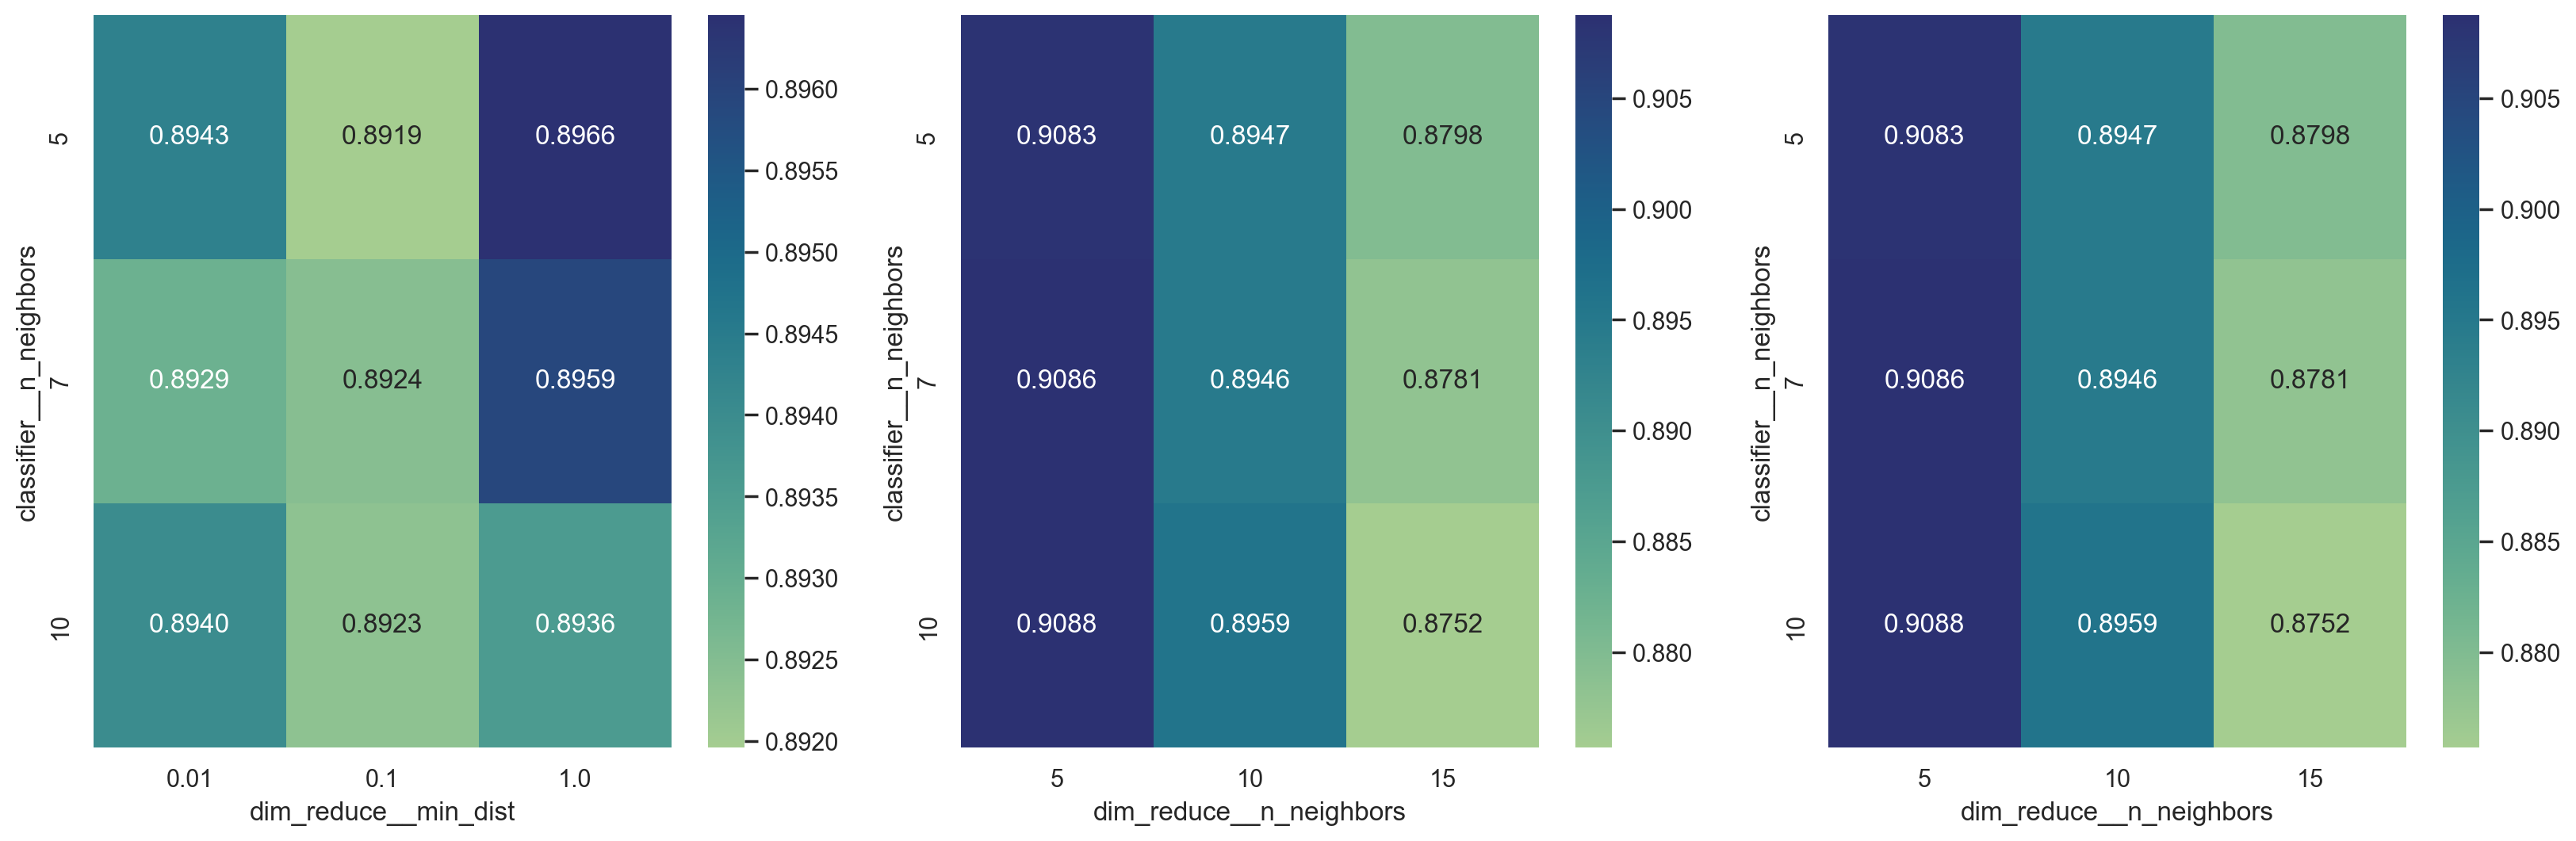

In [33]:
# this makes a 2d heatmap comparing JUST TWO of the parameters you are interested in 

# YOU MUST INTERVENE HERE
# the first two args to .pivot (index, columns) 
# must be the names of the parameters you want to score
# right now this assumes you are comparing the first two params
# modify it according to what you need to visualize!!!
# if you're doing 3 params, you may need to make 2 heatmaps, one for each pair of params

grid_params = results.columns
heatvals1 = results.pivot_table(index=grid_params[0],
                           columns=grid_params[1],
                           values='score')

heatvals2 = results.pivot_table(index=grid_params[0],
                           columns=grid_params[2],
                           values='score')

heatvals3 = results.pivot_table(index=grid_params[1],
                           columns=grid_params[2],
                           values='score')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

sns.heatmap(heatvals1, annot=True, fmt='5.4f', robust=True, cmap="crest", ax=axes[0]);
sns.heatmap(heatvals2, annot=True, fmt='5.4f', robust=True, cmap="crest", ax=axes[1]);
sns.heatmap(heatvals2, annot=True, fmt='5.4f', robust=True, cmap="crest", ax=axes[2]);

display(heatvals1)
display(heatvals2)
display(heatvals3)


In [34]:
# NB some people have a problem where you only see the first row
# of the numeric annotations in the heatmap above
# if that affects you no big deal.  thats why I made it print the results grid too
# if you want, you can try to uncomment the following, run it, and restart your kernel
# %pip install seaborn --upgrade 

In my grid search, after finding the broad range of hyperparameters to test, I fitted my pipeline 81 times. I tested various combinations of `min_dist`, `n_neighbors` (hyperparameters of UMAP), and `n_neighbors` (hyperparameter of KNN). Ultimately, the best combination of value is:
- `classifier__n_neighbors`: 5.000000
- `dim_reduce__min_dist`: 0.100000
- `dim_reduce__n_neighbors`: 5.000000

which results in an accuracy value of 0.901667.

<!-- END QUESTION -->

## The End of A4

Have a look back over your answers, and also make sure to `Restart & Run All` from the kernel menu to double check that everything is working properly. This restarts everything and runs your code from top to bottom.

Once you're happy with your work, click the disk icon to save, and submit the zip file onto gradescope. **You MUST submit all the required component to receive credit.**

Note that you can submit at any time, but **we grade your most recent submission**. This means that **if you submit an updated notebook after the submission deadline, it will be marked as late**.

_Note:_ If you encountered `LatexFailed` message during exporting, or has the `AttributeError: module 'nbconvert' has no attribute 'pdf'` error, it indicates that your $\LaTeX$ code is not correct. Try to the LaTeX syntax error by scrolling up to see the LaTeX error message. If you need any additional helps, please make a private post on campuswire and we are happy to help.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit.

Please make sure to see the output of the gradescope autograder. You are responsible for waiting and ensuring that the autograder is executing normally for your submission. Please create a campuswire post if you see errors in autograder execution.

In [35]:
grader.export(force_save=True, run_tests=True, files=['data'])

<IPython.core.display.Javascript object>

/Users/olimpiacarrioli/Assignments_WI24-1/COGS118B_venv/lib/python3.9/site-packages/otter/check/notebook.py:434: UserWarning: Couldn't automatically save the notebook; we recommend using File > Save & Checkpoint and then re-running this cell. The zip file returned by this call will use the last saved version of this notebook.
  warnings.warn(


Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    11_multiple_choice results: All test cases passed!

    31_plot_pca results: All test cases passed!

    32_plot_tsne results: All test cases passed!

    33_plot_umap results: All test cases passed!

    41_UMAP_Basis results: All test cases passed!

    42_UMAP_model_selection results: All test cases passed!
